In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import descartes 
import seaborn as sns
import plotly.express as px
import re

In [2]:
# Importanmos el archivo a usar
df = pd.read_csv("./properatti.csv")

In [3]:
df.head(5)

Unnamed: 0 operation property_type place_name  \
0           0      sell            PH  Mataderos   
1           1      sell     apartment   La Plata   
2           2      sell     apartment  Mataderos   
3           3      sell            PH    Liniers   
4           4      sell     apartment     Centro   

                             place_with_parent_names country_name  \
0              |Argentina|Capital Federal|Mataderos|    Argentina   
1        |Argentina|Bs.As. G.B.A. Zona Sur|La Plata|    Argentina   
2              |Argentina|Capital Federal|Mataderos|    Argentina   
3                |Argentina|Capital Federal|Liniers|    Argentina   
4  |Argentina|Buenos Aires Costa Atlántica|Mar de...    Argentina   

                     state_name  geonames_id                  lat-lon  \
0               Capital Federal    3430787.0  -34.6618237,-58.5088387   
1        Bs.As. G.B.A. Zona Sur    3432039.0  -34.9038831,-57.9643295   
2               Capital Federal    3430787.0  -34.6522615,-58.5229825   
3               Capital Federal    3431333.0  -34.6477969,-58.5164244   
4  Buenos Aires Costa Atlántica    3435548.0  -38.0026256,-57.5494468   

         lat  ...  surface_covered_in_m2  price_usd_per_m2 price_per_m2  \
0 -34.661824  ...                   40.0       1127.272727  1550.000000   
1 -34.903883  ...                    NaN               NaN          NaN   
2 -34.652262  ...                   55.0       1309.090909  1309.090909   
3 -34.647797  ...                    NaN               NaN          NaN   
4 -38.002626  ...                   35.0       1828.571429  1828.571429   

   floor  rooms  expenses                                      properati_url  \
0    NaN    NaN       NaN  http://www.properati.com.ar/15bo8_venta_ph_mat...   
1    NaN    NaN       NaN  http://www.properati.com.ar/15bob_venta_depart...   
2    NaN    NaN       NaN  http://www.properati.com.ar/15bod_venta_depart...   
3    NaN    NaN       NaN  http://www.properati.com.ar/15boh_venta_ph_lin...   
4    NaN    NaN       NaN  http://www.properati.com.ar/15bok_venta_depart...   

                                         description  \
0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...   
1  Venta de departamento en décimo piso al frente...   
2  2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...   
3  PH 3 ambientes con patio. Hay 3 deptos en lote...   
4  DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...   

                                               title  \
0                 2 AMB TIPO CASA SIN EXPENSAS EN PB   
1  VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37   ...   
2           2 AMB 3ER PISO CON ASCENSOR APTO CREDITO   
3                       PH 3 amb. cfte. reciclado      
4  DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...   

                                     image_thumbnail  
0  https://thumbs4.properati.com/8/BluUYiHJLhgIIK...  
1  https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...  
2  https://thumbs4.properati.com/5/SXKr34F_IwG3W_...  
3  https://thumbs4.properati.com/3/DgIfX-85Mog5SP...  
4  https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...  

[5 rows x 26 columns]

In [4]:
print("\x1b[1;33m"+"--------------------------------")
print("\x1b[1;33m"+"Shape", df.shape)
print("\x1b[1;33m"+"--------------------------------")
print("\x1b[1;33m"+"Columnas y sus tipos", df.dtypes)
print("\x1b[1;33m"+"--------------------------------")

--------------------------------
Shape (121220, 26)
--------------------------------
Columnas y sus tipos Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description         

In [5]:
#Como vemos, da igual, por lo que pasamos a borrarla.
df = df.drop(["Unnamed: 0"], axis=1)
df.sample(2)

operation property_type place_name      place_with_parent_names  \
98542       sell         house    Mendoza  |Argentina|Mendoza|Mendoza|   
106736      sell     apartment    Córdoba  |Argentina|Córdoba|Córdoba|   

       country_name state_name  geonames_id lat-lon  lat  lon  ...  \
98542     Argentina    Mendoza    3844421.0     NaN  NaN  NaN  ...   
106736    Argentina    Córdoba    3860259.0     NaN  NaN  NaN  ...   

        surface_covered_in_m2 price_usd_per_m2  price_per_m2  floor  rooms  \
98542                   150.0      1366.666667   1366.666667    NaN    NaN   
106736                    NaN              NaN           NaN    NaN    NaN   

        expenses                                      properati_url  \
98542     6300.0  http://www.properati.com.ar/1bln2_venta_casa_m...   
106736       NaN  http://www.properati.com.ar/1bwrz_venta_depart...   

                                              description  \
98542   Living comedor con una superficie aproximada d...   
106736  Departamento con WiFi, Córdoba, Córdoba, por $...   

                        title  \
98542          Casa - Dalvian   
106736  Departamento - Centro   

                                          image_thumbnail  
98542   https://thumbs4.properati.com/3/L72thk80hpAw8C...  
106736  https://thumbs4.properati.com/0/ZKKJwc4dazP999...  

[2 rows x 25 columns]

In [6]:
#Borro la columna "operation" porque todas son ventas.
df = df.drop(["operation"], axis=1)
df.head(3)

property_type place_name                      place_with_parent_names  \
0            PH  Mataderos        |Argentina|Capital Federal|Mataderos|   
1     apartment   La Plata  |Argentina|Bs.As. G.B.A. Zona Sur|La Plata|   
2     apartment  Mataderos        |Argentina|Capital Federal|Mataderos|   

  country_name              state_name  geonames_id                  lat-lon  \
0    Argentina         Capital Federal    3430787.0  -34.6618237,-58.5088387   
1    Argentina  Bs.As. G.B.A. Zona Sur    3432039.0  -34.9038831,-57.9643295   
2    Argentina         Capital Federal    3430787.0  -34.6522615,-58.5229825   

         lat        lon     price  ... surface_covered_in_m2  \
0 -34.661824 -58.508839   62000.0  ...                  40.0   
1 -34.903883 -57.964330  150000.0  ...                   NaN   
2 -34.652262 -58.522982   72000.0  ...                  55.0   

   price_usd_per_m2  price_per_m2  floor  rooms  expenses  \
0       1127.272727   1550.000000    NaN    NaN       NaN   
1               NaN           NaN    NaN    NaN       NaN   
2       1309.090909   1309.090909    NaN    NaN       NaN   

                                       properati_url  \
0  http://www.properati.com.ar/15bo8_venta_ph_mat...   
1  http://www.properati.com.ar/15bob_venta_depart...   
2  http://www.properati.com.ar/15bod_venta_depart...   

                                         description  \
0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...   
1  Venta de departamento en décimo piso al frente...   
2  2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...   

                                               title  \
0                 2 AMB TIPO CASA SIN EXPENSAS EN PB   
1  VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37   ...   
2           2 AMB 3ER PISO CON ASCENSOR APTO CREDITO   

                                     image_thumbnail  
0  https://thumbs4.properati.com/8/BluUYiHJLhgIIK...  
1  https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...  
2  https://thumbs4.properati.com/5/SXKr34F_IwG3W_...  

[3 rows x 24 columns]

In [7]:
# Drop column "lat-lon" porque es repetitiva
df = df.drop(["lat-lon"], axis=1)
df

property_type       place_name  \
0                 PH        Mataderos   
1          apartment         La Plata   
2          apartment        Mataderos   
3                 PH          Liniers   
4          apartment           Centro   
...              ...              ...   
121215     apartment         Belgrano   
121216         house           Beccar   
121217     apartment    Villa Urquiza   
121218     apartment      Plaza Colón   
121219     apartment  Capital Federal   

                                  place_with_parent_names country_name  \
0                   |Argentina|Capital Federal|Mataderos|    Argentina   
1             |Argentina|Bs.As. G.B.A. Zona Sur|La Plata|    Argentina   
2                   |Argentina|Capital Federal|Mataderos|    Argentina   
3                     |Argentina|Capital Federal|Liniers|    Argentina   
4       |Argentina|Buenos Aires Costa Atlántica|Mar de...    Argentina   
...                                                   ...          ...   
121215               |Argentina|Capital Federal|Belgrano|    Argentina   
121216  |Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...    Argentina   
121217          |Argentina|Capital Federal|Villa Urquiza|    Argentina   
121218  |Argentina|Buenos Aires Costa Atlántica|Mar de...    Argentina   
121219                        |Argentina|Capital Federal|    Argentina   

                          state_name  geonames_id        lat        lon  \
0                    Capital Federal    3430787.0 -34.661824 -58.508839   
1             Bs.As. G.B.A. Zona Sur    3432039.0 -34.903883 -57.964330   
2                    Capital Federal    3430787.0 -34.652262 -58.522982   
3                    Capital Federal    3431333.0 -34.647797 -58.516424   
4       Buenos Aires Costa Atlántica    3435548.0 -38.002626 -57.549447   
...                              ...          ...        ...        ...   
121215               Capital Federal    3436077.0        NaN        NaN   
121216      Bs.As. G.B.A. Zona Norte    3436080.0        NaN        NaN   
121217               Capital Federal    3433775.0 -34.570639 -58.475596   
121218  Buenos Aires Costa Atlántica          NaN        NaN        NaN   
121219               Capital Federal    3433955.0        NaN        NaN   

           price currency  ...  surface_covered_in_m2  price_usd_per_m2  \
0        62000.0      USD  ...                   40.0       1127.272727   
1       150000.0      USD  ...                    NaN               NaN   
2        72000.0      USD  ...                   55.0       1309.090909   
3        95000.0      USD  ...                    NaN               NaN   
4        64000.0      USD  ...                   35.0       1828.571429   
...          ...      ...  ...                    ...               ...   
121215  870000.0      USD  ...                   93.0       7699.115044   
121216  498000.0      USD  ...                  360.0       1383.333333   
121217  131500.0      USD  ...                   39.0       2858.695652   
121218   95900.0      USD  ...                   48.0       1997.916667   
121219  129000.0      USD  ...                   77.0       1675.324675   

        price_per_m2  floor  rooms  expenses  \
0        1550.000000    NaN    NaN       NaN   
1                NaN    NaN    NaN       NaN   
2        1309.090909    NaN    NaN       NaN   
3                NaN    NaN    NaN       NaN   
4        1828.571429    NaN    NaN       NaN   
...              ...    ...    ...       ...   
121215   9354.838710    NaN    NaN   10000.0   
121216   1383.333333    NaN    NaN       NaN   
121217   3371.794872    NaN    NaN       NaN   
121218   1997.916667    NaN    NaN       NaN   
121219   1675.324675    NaN    NaN    3500.0   

                                            properati_url  \
0       http://www.properati.com.ar/15bo8_venta_ph_mat...   
1       http://www.properati.com.ar/15bob_venta_depart...   
2       http://www.properati.com.ar/15bod_venta_depart...   
3 

In [8]:
# Deseamos conocer el porcentaje de nulos por columna;
porcentaje_nulos_por_columna= (pd.isna(df).sum()/len(df))*100
round(porcentaje_nulos_por_columna.sort_values(ascending=False),2)

floor                         93.48
expenses                      88.23
rooms                         60.91
price_usd_per_m2              43.39
lat                           42.53
lon                           42.53
surface_total_in_m2           32.44
price_per_m2                  27.69
currency                      16.84
price_aprox_usd               16.84
price                         16.84
price_aprox_local_currency    16.84
surface_covered_in_m2         16.42
geonames_id                   15.44
image_thumbnail                2.57
place_name                     0.02
description                    0.00
title                          0.00
properati_url                  0.00
state_name                     0.00
country_name                   0.00
place_with_parent_names        0.00
property_type                  0.00
dtype: float64

In [9]:
# Revisamos el porcentaje de propiedades que hay en cada región.
state_name_mix = (df["state_name"].value_counts()/len(df)).reset_index()
state_name_mix['state_name'] = (state_name_mix['state_name']*100).round(1) 
state_name_mix.columns = ['state_name', 'mix']
state_name_mix

state_name   mix
0                Capital Federal  26.7
1       Bs.As. G.B.A. Zona Norte  21.1
2         Bs.As. G.B.A. Zona Sur  11.5
3                        Córdoba  10.0
4                       Santa Fe   8.4
5   Buenos Aires Costa Atlántica   8.3
6       Bs.As. G.B.A. Zona Oeste   7.7
7          Buenos Aires Interior   1.9
8                      Río Negro   0.7
9                        Neuquén   0.6
10                       Mendoza   0.6
11                       Tucumán   0.6
12                    Corrientes   0.5
13                      Misiones   0.4
14                    Entre Ríos   0.3
15                         Salta   0.2
16                        Chubut   0.2
17                      San Luis   0.2
18                      La Pampa   0.1
19                       Formosa   0.1
20                         Chaco   0.0
21                      San Juan   0.0
22              Tierra Del Fuego   0.0
23                     Catamarca   0.0
24                         Jujuy   0.0
25                    Santa Cruz   0.0
26           Santiago Del Estero   0.0
27                      La Rioja   0.0

In [10]:
# Graficamos la cantidad de propiedades por provincia

fig = px.bar(data_frame = state_name_mix[state_name_mix["mix"] >1.8], x='state_name' , y='mix', text='mix' , width=500, height=500)

fig.update_layout(
    title='<b>Propiedades por Provincia</b>',
    xaxis_tickfont_size=10,
    yaxis=dict(title='% del total',titlefont_size=14,tickfont_size=10),
    title_x=0.5)
fig.update_traces(textposition='inside', textangle = 0, insidetextanchor='middle')

fig.show()

In [11]:
#Calculamos la cantidad de datos que van a quedar fuera en el nuevo df por tener pocos datos.
state_name_mix_menor_1_9 = state_name_mix[state_name_mix["mix"]<1.9]["state_name"].tolist()

df.loc[df["state_name"].isin(state_name_mix_menor_1_9),:].shape

(5532, 23)

In [12]:
# Sort dataframe by columns, al df original lo ordenamos por columnas como queremos;

df_column_sorted = {
    "floor": df["floor"],
    "expenses": df["expenses"],
    "rooms": df["rooms"],
    "price_usd_per_m2": df["price_usd_per_m2"],
    "lon": df["lon"],
    "lat": df["lat"],
    "surface_total_in_m2": df["surface_total_in_m2"],
    "currency": df["currency"],
    "price_aprox_usd": df["price_aprox_usd"],
    "price_aprox_local_currency": df["price_aprox_local_currency"],
    "price": df["price"],
    "surface_covered_in_m2": df["surface_covered_in_m2"],
    "place_name": df["place_name"],
    "geonames_id": df["geonames_id"],
    "state_name": df["state_name"],
    "title": df["title"],
    "description": df["description"],
    "property_type": df["property_type"]
}

df = pd.DataFrame(df_column_sorted)

In [13]:
# Seteamos como index, los valores de state_name;
df = df.set_index("state_name")

In [14]:
#Antes de hacer el count de abajo, quiero, en esta línea, dejar sólo los registros iguales a:
state_name_list_ok = ["Capital Federal",
"Bs.As. G.B.A. Zona Norte",
"Bs.As. G.B.A. Zona Sur",
"Córdoba",
"Santa Fe",
"Buenos Aires Costa Atlántica",
"Bs.As. G.B.A. Zona Oeste",
"Buenos Aires Interior"]

In [15]:
# Cantidad de registros sin la segmentación por state_name;
df.shape

(121220, 17)

In [16]:
# Cantidad de registros luego de la segmentación por state_name;
df.loc[state_name_list_ok, :].shape

(115688, 17)

In [17]:
# df con los datos de los 8 state_name más importantes.
df = df.loc[state_name_list_ok, :]

In [18]:
# Comenzamos a trabajar con la columna "floor" a continuación, para ver si la podemso salvar;

In [19]:
#Vemos la cantidad de no nulos en la columna floor para todos los datos.
df.loc[df["floor"].notnull()].describe()

floor      expenses        rooms  price_usd_per_m2          lon  \
count  7615.000000   1027.000000  5441.000000       3208.000000  5905.000000   
mean     17.403152   2522.842259     2.647307       2340.929008   -59.683618   
std     116.985284   2481.155954     1.271013        868.641196     2.270634   
min       1.000000      1.000000     1.000000         29.906933   -75.678931   
25%       1.000000   1200.000000     2.000000       1857.142857   -60.639286   
50%       3.000000   1800.000000     3.000000       2239.436620   -58.478612   
75%       6.000000   2869.000000     3.000000       2787.656423   -58.423104   
max    2509.000000  19000.000000    22.000000      19800.000000   -56.674305   

               lat  surface_total_in_m2  price_aprox_usd  \
count  5905.000000          3595.000000     6.795000e+03   
mean    -33.928174            81.444228     2.251617e+05   
std       1.488243           245.697695     3.037610e+05   
min     -38.583214            10.000000     0.000000e+00   
25%     -34.618785            45.000000     9.200000e+04   
50%     -34.589013            60.000000     1.380000e+05   
75%     -32.957491            84.000000     2.250000e+05   
max       4.545843          9563.000000     3.900000e+06   

       price_aprox_local_currency         price  surface_covered_in_m2  \
count                6.795000e+03  6.795000e+03            6898.000000   
mean                 3.972866e+06  3.527507e+05              99.895332   
std                  5.359711e+06  6.354222e+05             325.831184   
min                  0.000000e+00  0.000000e+00               1.000000   
25%                  1.623294e+06  1.020000e+05              44.000000   
50%                  2.434941e+06  1.500000e+05              60.000000   
75%                  3.970012e+06  2.710000e+05              93.000000   
max                  6.881355e+07  1.168104e+07           12731.000000   

        geonames_id  
count  6.812000e+03  
mean   3.635403e+06  
std    5.406267e+05  
min    3.427326e+06  
25%    3.429651e+06  
50%    3.433955e+06  
75%    3.838574e+06  
max    6.942539e+06

In [20]:
#Cantidad de datos no nulos en floor.
df["floor"].count()

7615

In [21]:
# Buscamos el dato del edificio más grande de arg que tiene 54 pisos y calculamos la cantidad de registros por encima de este umbral;
df["floor"][df["floor"] > 54].count()

180

In [22]:
# Reseteamos el index del df original para poder limpiarlo;
df.reset_index(inplace=True)

In [23]:
# Guardamos en una variable el index de todos los que son mayores a 54.
indices_mayor_54_floor = df[df["floor"] > 54].index.tolist()

In [24]:
# porcentaje de los valores outliers de floor mayores a 54.
outliers_floor_mayores_a_54 = 180/7615*100
print("\x1b[1;33m"+"Porcentaje outliers floor mayores a 54 pisos:", np.round(outliers_floor_mayores_a_54, 3),"%")

Porcentaje outliers floor mayores a 54 pisos: 2.364 %


In [25]:
# La cantidad de datos erróneos en la columna floor respecto a la cantidad total de datos.
print("\x1b[1;33m"+"cantidad de datos erróneos en la columna floor respecto a la cantidad total de datos:", np.round(180/df.shape[0]*100, 3),"%")

cantidad de datos erróneos en la columna floor respecto a la cantidad total de datos: 0.156 %


In [26]:
# Imputamos los datos mayores a 54 de la columna floor por apartment con NAN.
df["floor"].where(df["floor"] < 54, np.NAN, inplace=True)

In [27]:
# Verificamos que los 180 registros que tenían datos erróneos en la columna floor, fueron reemplazados por NAN.
df[df.index.isin(indices_mayor_54_floor)].head(3)

state_name  floor  expenses  rooms  price_usd_per_m2        lon  \
984   Capital Federal    NaN       NaN    2.0               NaN -58.479707   
1269  Capital Federal    NaN       NaN    3.0               NaN -58.472350   
1270  Capital Federal    NaN       NaN    4.0               NaN -58.472617   

            lat  surface_total_in_m2 currency  price_aprox_usd  \
984  -34.566330                  NaN      USD         175000.0   
1269 -34.575419                  NaN      NaN              NaN   
1270 -34.575560                  NaN      NaN              NaN   

      price_aprox_local_currency     price  surface_covered_in_m2  \
984                    3087787.5  175000.0                   65.0   
1269                         NaN       NaN                    NaN   
1270                         NaN       NaN                    NaN   

         place_name  geonames_id  \
984   Villa Urquiza    3433775.0   
1269       Belgrano    3436077.0   
1270       Belgrano    3436077.0   

                                                  title  \
984   2 AMB BALCÓN CON PARRILLA - EDIFICIO CON AMENI...   
1269    LA PAMPA AL 4300, Exclusivo Desarrollo en Pesos   
1270              LA PAMPA 4300 AIR PAMPA POZO EN PESOS   

                                            description property_type  
984   Corredor Responsable: Rebeca Stern - C.U.C.I.C...     apartment  
1269  Corredor Responsable: Raul Hector Merlo - CUCI...     apartment  
1270  Corredor Responsable: Raul Hector Merlo - CUCI...     apartment

In [28]:
# Pensamos en imputar los datos que son casas con valores de 0, porque tienen piso cero, de ahí empezamos a hacer el siguiente análisis:

# Contamos la cantidad de registros que son casas.
df_house = df.loc[df["property_type"] == "house"]

pd.DataFrame(df_house)

state_name  floor  expenses  rooms  price_usd_per_m2  \
13            Capital Federal    NaN       NaN    NaN        875.000000   
15            Capital Federal    NaN       NaN    NaN       1091.269841   
26            Capital Federal    NaN       NaN    NaN        944.444444   
27            Capital Federal    NaN       NaN    NaN        658.602151   
28            Capital Federal    NaN       NaN    NaN        611.111111   
...                       ...    ...       ...    ...               ...   
115678  Buenos Aires Interior    NaN       NaN    5.0        400.801603   
115680  Buenos Aires Interior    NaN       NaN    4.0        747.782267   
115684  Buenos Aires Interior    NaN       NaN    5.0        172.839506   
115686  Buenos Aires Interior    NaN       NaN    4.0        192.307692   
115687  Buenos Aires Interior    NaN       NaN    NaN               NaN   

              lon        lat  surface_total_in_m2 currency  price_aprox_usd  \
13     -58.362056 -34.617719                 80.0      USD         70000.00   
15     -58.410702 -34.636321                504.0      USD        550000.00   
26            NaN        NaN                180.0      USD        170000.00   
27            NaN        NaN                744.0      USD        490000.00   
28            NaN        NaN                720.0      USD        440000.00   
...           ...        ...                  ...      ...              ...   
115678 -59.100573 -37.313734                499.0      USD        200000.00   
115680 -62.277651 -38.730753                 75.0      ARS         56083.67   
115684        NaN        NaN               1215.0      USD        210000.00   
115686 -58.259803 -37.837561                390.0      USD         75000.00   
115687        NaN        NaN                  NaN      USD        130000.00   

        price_aprox_local_currency      price  surface_covered_in_m2  \
13                      1235115.00    70000.0                   50.0   
15                      9704475.00   550000.0                  324.0   
26                      2999565.00   170000.0                  165.0   
27                      8645805.00   490000.0                  350.0   
28                      7763580.00   440000.0                  261.0   
...                            ...        ...                    ...   
115678                  3528900.00   200000.0                  156.0   
115680                   989568.31  1000000.0                   70.0   
115684                  3705345.00   210000.0                  250.0   
115686                  1323337.50    75000.0                  135.0   
115687                  2293785.00   130000.0                  105.0   

                  place_name  geonames_id  \
13             Puerto Madero    3429760.0   
15                     Boedo    3436003.0   
26           Capital Federal    3433955.0   
27           Capital Federal    3433955.0   
28           Capital Federal    3433955.0   
...                      ...          ...   
115678                Tandil    3427832.0   
115680          Bahía Blanca    3865084.0   
115684  Sierra de los Padres    3427958.0   
115686              Balcarce    3436176.0   
115687                 Luján    3430982.0   

                                                    title  \
13      FLOAT LIFE - CASA FLOTANTE - UBICABLE EN CLUBS...   
15              Casa impecable refaccionada! 6 ambientes.   
26      Casa 180m² con 2 Plantas en Navarro, Julián 29...   
27      Casa 744m² con 2 Plantas en Del Valle Iberluce...   
28      Casa 720m² con Plantas en Palma, Diego 1800, A...   
...                                                   ...   
115678                                         Casa venta   
115680                            Oportunidad Donado 1100   
115684                              Sierras de los Padres   
115686                           Casa+ Depto monoambiente   
115687                                Casa - Hosteria Sur   

                              

In [29]:
#Obtenemos el index de todos los datos que son casas:
indices_floor_house = df.loc[df["property_type"] == "house"].index.tolist()
print("\x1b[1;33m"+"Cantidad de datos house:", len(indices_floor_house))

Cantidad de datos house: 37554


In [30]:
# ¿Qué porcentaje representan las casas del total de registros?
print("\x1b[1;33m"+"Porcentaje de registros que son casas del df: ", np.round(df_house.shape[0] / df.shape[0] * 100,3),"%", sep="")

Porcentaje de registros que son casas del df: 32.461%


In [31]:
# Imputamos todos los registros de casas para que tengan, en floor, valor 0 (cero);
df.loc[df["property_type"]=="house","floor"] = 0

In [32]:
# Verificamos que haya cambiado todos los valores a cero del paso anterior.
df.loc[df["property_type"]=="house", "floor"].head(50)

13     0.0
15     0.0
26     0.0
27     0.0
28     0.0
29     0.0
31     0.0
33     0.0
79     0.0
80     0.0
81     0.0
82     0.0
83     0.0
84     0.0
123    0.0
124    0.0
137    0.0
138    0.0
139    0.0
140    0.0
141    0.0
142    0.0
143    0.0
156    0.0
215    0.0
217    0.0
229    0.0
232    0.0
233    0.0
271    0.0
278    0.0
282    0.0
372    0.0
373    0.0
376    0.0
377    0.0
422    0.0
423    0.0
425    0.0
428    0.0
430    0.0
442    0.0
444    0.0
445    0.0
450    0.0
465    0.0
477    0.0
495    0.0
497    0.0
502    0.0
Name: floor, dtype: float64

In [33]:
# Vemos que luego de la imputación, bajó considerablemente la cantidad de nulos de la columna floor, al principio eran 113316 registros;
df.isnull().sum()

state_name                         0
floor                          71426
expenses                      101758
rooms                          69989
price_usd_per_m2               49058
lon                            48639
lat                            48639
surface_total_in_m2            37058
currency                       17871
price_aprox_usd                17870
price_aprox_local_currency     17870
price                          17870
surface_covered_in_m2          17744
place_name                        23
geonames_id                    18527
title                              0
description                        2
property_type                      0
dtype: int64

In [34]:
# Deseamos conocer el porcentaje de nulos por columna, vemos que el porcentaje de floor bajó considerablemente, al principio estaba en 93.48%;
porcentaje_nulos_por_columna= (pd.isna(df).sum()/len(df))*100
round(porcentaje_nulos_por_columna.sort_values(ascending=False),2)

expenses                      87.96
floor                         61.74
rooms                         60.50
price_usd_per_m2              42.41
lat                           42.04
lon                           42.04
surface_total_in_m2           32.03
geonames_id                   16.01
currency                      15.45
price                         15.45
price_aprox_local_currency    15.45
price_aprox_usd               15.45
surface_covered_in_m2         15.34
place_name                     0.02
description                    0.00
property_type                  0.00
title                          0.00
state_name                     0.00
dtype: float64

In [35]:
# Revisamos el porcentaje de propiedades que hay por tipo.
property_type_mix = (df["property_type"].value_counts()/len(df)).reset_index()
property_type_mix['property_type'] = (property_type_mix['property_type']*100).round(1)
property_type_mix.columns = ['property_type', 'mix']
property_type_mix

property_type   mix
0     apartment  59.4
1         house  32.5
2            PH   4.8
3         store   3.3

In [36]:
# Graficamos el porcentaje por tipo de propiedad que hay en el DataFrame

fig = px.bar(data_frame= property_type_mix, x='property_type' , y='mix', text = 'mix'  , width=500, height=500)

fig.update_layout(
    title='<b>Propiedades por Tipo</b>',
    xaxis_tickfont_size=10,
    yaxis=dict(title='% del total',titlefont_size=14,tickfont_size=10),
    title_x=0.5)
fig.update_traces(textposition='inside', textangle = 0, insidetextanchor='middle')
fig.show()

In [37]:
# Total de datos no nulos y diferentes a cero, filtrados por apartment; Apartment es el tipo de propiedad que más datos tiene, si no tiene potencial de imputación porque tiene pocos datos nulos, eliminamos la columna floor;
dptos_dif_nan_y_cero = df.loc[(df["floor"] != 0) & (~np.isnan(df["floor"]))& (df["property_type"] == "apartment"), :].shape

print("\x1b[1;33m"+"(dptos) Total de datos diferentes a NaN y diferentes a cero: ", dptos_dif_nan_y_cero)

(dptos) Total de datos diferentes a NaN y diferentes a cero:  (6158, 18)


In [38]:
# Cantidad total de registros de dptos en el dataset.
dptos_all_shape = df.loc[df["property_type"] == "apartment"].shape
print("\x1b[1;33m"+"Cantidad total de registros de dptos en el dataset: ", dptos_all_shape)

Cantidad total de registros de dptos en el dataset:  (68740, 18)


In [39]:
# Porcentaje de registros de dptos en todo el dataset con valores distintos de cero y distintos de NaN, respecto al total de registros de dptos.
proporcion_dptos_not_nan_ni_cero_all_dptos = dptos_dif_nan_y_cero[0] / dptos_all_shape[0] * 100

print("\x1b[1;33m"+"Relación dptos not null ni cero respecto a total dptos:", np.round(proporcion_dptos_not_nan_ni_cero_all_dptos,3),"%")

Relación dptos not null ni cero respecto a total dptos: 8.958 %


Decisión final sobre la columna "floor": Eliminación.

Motivo: La proporción de departamentos que no tienen valores cero ni NaN, respecto del total es demasiado baja para tomar decisiones al respecto, por el momento, decidimos eliminarla;

In [40]:
# drop columna floor respecto a la conclusión de arriba;
df = df.drop(["floor"], axis=1) 
#--> Lo comentamos porque ya lo dropeamos y devuelve error;

In [41]:
# drop columna expenses por faltante de datos, no creemos que vaya a sumar al modelo;
df = df.drop(["expenses"], axis=1);  
# --> Lo comentamos porque ya lo dropeamos y devuelve error;


In [42]:
# drop de currency porque todas tienen la misma moneda;
df = df.drop(["currency"], axis=1)

##### --> Acá terminamos la primer etapa de la limpieza;

<br>

<hr>

### ---> Segunda parte de limpieza;

<p>A este punto nos damos cuenta que tenemos que empezar a limpiar las columnas surface_covered_in_m2, surface_total_in_m2, y todas las columnas que tengan una íntima relación en la definición del valor de price_usd_per_m2;</p>

In [43]:
# Filtro el dataset para que me muestre solo las columnas sobre precios y m2, sumamos la property_type y state_name para poder segmentar por estas también.
# En este punto, creamos el df df_price_and_m2, y toda modificaicón que realizamos en él, lo vamos plasmando también en el df original con nombre df;
df_price_and_m2 = df.loc[:,["price_usd_per_m2", "surface_total_in_m2", "price_aprox_usd", "price", "surface_covered_in_m2", "price_aprox_local_currency", "property_type", "state_name"]]

df_price_and_m2.head(5)

price_usd_per_m2  surface_total_in_m2  price_aprox_usd     price  \
0       1127.272727                 55.0          62000.0   62000.0   
1       1309.090909                 55.0          72000.0   72000.0   
2               NaN                  NaN          95000.0   95000.0   
3       3066.666667                 45.0         138000.0  138000.0   
4       3000.000000                 65.0         195000.0  195000.0   

   surface_covered_in_m2  price_aprox_local_currency property_type  \
0                   40.0                   1093959.0            PH   
1                   55.0                   1270404.0     apartment   
2                    NaN                   1676227.5            PH   
3                   40.0                   2434941.0     apartment   
4                   60.0                   3440677.5     apartment   

        state_name  
0  Capital Federal  
1  Capital Federal  
2  Capital Federal  
3  Capital Federal  
4  Capital Federal

In [44]:
#Cantidad de nulos por columna en cada una de las columnas de price y m2;
df_price_and_m2.isnull().sum().sort_values(ascending=False)

price_usd_per_m2              49058
surface_total_in_m2           37058
price_aprox_local_currency    17870
price                         17870
price_aprox_usd               17870
surface_covered_in_m2         17744
state_name                        0
property_type                     0
dtype: int64

In [45]:
#Cantidad total de registros;
df_price_and_m2.shape[0]

115688

In [46]:
# Proporción de nulls por columna según total de registros;
(df_price_and_m2.isnull().sum() / df_price_and_m2.shape[0] * 100).sort_values(ascending = False)

price_usd_per_m2              42.405435
surface_total_in_m2           32.032709
price_aprox_local_currency    15.446719
price                         15.446719
price_aprox_usd               15.446719
surface_covered_in_m2         15.337805
state_name                     0.000000
property_type                  0.000000
dtype: float64

In [47]:
# Verifico que el reset_index haya funcionado correctamente;
df_price_and_m2.head(2)

price_usd_per_m2  surface_total_in_m2  price_aprox_usd    price  \
0       1127.272727                 55.0          62000.0  62000.0   
1       1309.090909                 55.0          72000.0  72000.0   

   surface_covered_in_m2  price_aprox_local_currency property_type  \
0                   40.0                   1093959.0            PH   
1                   55.0                   1270404.0     apartment   

        state_name  
0  Capital Federal  
1  Capital Federal

In [48]:
#Guardo los índices de price_aprox_usd que son null en una lista;
index_price_aprox_usd_null = df_price_and_m2[df_price_and_m2["price_aprox_usd"].isnull()].index.tolist()

In [49]:
# Ahora rescato los indices de price_aprox_local_currency que son null;
index_price_aprox_local_currency_null = df_price_and_m2[df_price_and_m2["price_aprox_local_currency"].isnull()].index.tolist()

In [50]:
# Comparo las dos listas de índices de index_price_aprox_local_currency_null y index_price_aprox_usd_null para ver si son los mismso índices;
index_price_aprox_usd_null == index_price_aprox_local_currency_null

True

### Resolución:
<p>En un principio vimos que las columnas price_aprox_usd y price_aprox_local_currency presentaban la misma proporción de nulos, 15.446719%, al ser dos columnas de precio, donde una está sólo en dólares y la otra, en más de una moneda, como, por ejemplo, ARS, soles peruanos, pesos uruguayos, entre otros, decidimos que sería una buena idea estandarizar y usar dólares nada más, ahora, en la búsqueda de imputar el faltante de la columna en dólares, creímos que podríamos rescatar algo de la otra columna si es que no tenían los mismos registros con faltantes, pero no, resulta que, con la validación previa a este escrito, determinamos que se tratan de los mismos índices, por lo que lo único que resta hacer, es retirar la columna price_aprox_local_currency, lo cual lo realizamos a continuación.</p>

In [51]:
# Drop columna price_aprox_local_currency de df_price_and_m2;
df_price_and_m2 = df_price_and_m2.drop(["price_aprox_local_currency"], axis=1)

In [52]:
# Verificamos que se haya eliminado correctamente la columna price_aprox_local_currency de df_price_and_m2;
df_price_and_m2.head(2)

price_usd_per_m2  surface_total_in_m2  price_aprox_usd    price  \
0       1127.272727                 55.0          62000.0  62000.0   
1       1309.090909                 55.0          72000.0  72000.0   

   surface_covered_in_m2 property_type       state_name  
0                   40.0            PH  Capital Federal  
1                   55.0     apartment  Capital Federal

In [53]:
# Drop columna price_aprox_local_currency del df original;
df = df.drop(["price_aprox_local_currency"], axis=1)

In [54]:
# Verificamos que se haya eliminado correctamente la columna price_aprox_local_currency del df original;
df.head(2)

state_name  rooms  price_usd_per_m2        lon        lat  \
0  Capital Federal    NaN       1127.272727 -58.508839 -34.661824   
1  Capital Federal    NaN       1309.090909 -58.522982 -34.652262   

   surface_total_in_m2  price_aprox_usd    price  surface_covered_in_m2  \
0                 55.0          62000.0  62000.0                   40.0   
1                 55.0          72000.0  72000.0                   55.0   

  place_name  geonames_id                                     title  \
0  Mataderos    3430787.0        2 AMB TIPO CASA SIN EXPENSAS EN PB   
1  Mataderos    3430787.0  2 AMB 3ER PISO CON ASCENSOR APTO CREDITO   

                                         description property_type  
0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...            PH  
1  2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...     apartment


<br>
<hr>
<br>


#### Siguiente paso: Realizar la misma verificación de recién, pero entre las columnas price_aprox_usd y price;

In [55]:
# Rescatamos los indices de price que son null;

index_price_null = df_price_and_m2[df_price_and_m2["price"].isnull()].index.tolist()

In [56]:
# Comparamos las dos listas de índices de index_price_null y index_price_aprox_usd_null para ver si son los mismso índices;
index_price_aprox_usd_null == index_price_null

True

### Resolución:
<p>La columna price tiene exactamente los mismos registros con faltantes que la columna price_aprox_usd, por lo que, siguiendo la misma lógica que utilizamos para eliminar la columna price_aprox_local_currency, decidimos eliminar la columna price, lo cuál, lo realizamos a continuación.</p>

In [57]:
# Eliminamos la columna price de df_price_and_m2;
df_price_and_m2 = df_price_and_m2.drop(["price"], axis=1)

In [58]:
# Verificamos que la columna price haya sido eliminada de df_price_and_m2;
df_price_and_m2.head(2)

price_usd_per_m2  surface_total_in_m2  price_aprox_usd  \
0       1127.272727                 55.0          62000.0   
1       1309.090909                 55.0          72000.0   

   surface_covered_in_m2 property_type       state_name  
0                   40.0            PH  Capital Federal  
1                   55.0     apartment  Capital Federal

In [59]:
# Eliminamos la columna price del df original;
df = df.drop(["price"], axis=1)

In [60]:
# Verificamos que se haya borrado la columna price del df original;
df.head(2)

state_name  rooms  price_usd_per_m2        lon        lat  \
0  Capital Federal    NaN       1127.272727 -58.508839 -34.661824   
1  Capital Federal    NaN       1309.090909 -58.522982 -34.652262   

   surface_total_in_m2  price_aprox_usd  surface_covered_in_m2 place_name  \
0                 55.0          62000.0                   40.0  Mataderos   
1                 55.0          72000.0                   55.0  Mataderos   

   geonames_id                                     title  \
0    3430787.0        2 AMB TIPO CASA SIN EXPENSAS EN PB   
1    3430787.0  2 AMB 3ER PISO CON ASCENSOR APTO CREDITO   

                                         description property_type  
0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...            PH  
1  2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...     apartment


<br>
<hr>
<br>


#### Siguiente paso: Comenzamos a trabajar sobre las columnas surface_covered_in_m2 y surface_total_in_m2;

In [61]:
# Volvemos a ver la proporción de nulls por columna según total de registros sobre df_price_and_m2;
(df_price_and_m2.isnull().sum() / df_price_and_m2.shape[0] * 100).sort_values(ascending = False)

price_usd_per_m2         42.405435
surface_total_in_m2      32.032709
price_aprox_usd          15.446719
surface_covered_in_m2    15.337805
state_name                0.000000
property_type             0.000000
dtype: float64

In [62]:
# En el análisis que venimos haciendo, nos dimos cuenta que hay una relación entre price_usd_per_m2, surface_total_in_m2, price_aprox_usd y surface_covered_in_m2;
# Por este motivo, hicimos un groupby por state_name y property_type, con un describe, y vimos que habían varios datos muy grandes en varias columnas y std muy grandes, por lo que optamos por comenzar a limpiar esto;
# De acá en adelante, tomamos como referencia la segmentación por state_name == "Bs.As. G.B.A. Zona Norte" sobre cada tipo de propiedad para ir viendo su evolución tras la limpieza;
# Creamos una instancia de comparación inicial a la que la llamamos pantallazo1_surface_covered_in_m2, esta misma la vamos a ir comparando más adelante con otras instancias posteriores a las limpiezas;

pantallazo1_surface_covered_in_m2 = df_price_and_m2.groupby(["state_name", "property_type"]).describe()["surface_covered_in_m2"]
pantallazo1_surface_covered_in_m2

count        mean          std  \
state_name                   property_type                                     
Bs.As. G.B.A. Zona Norte     PH               909.0   85.288229    49.966955   
                             apartment       9839.0   74.610631   149.512375   
                             house          12533.0  247.839224   476.986116   
                             store            507.0  712.510848  2454.140063   
Bs.As. G.B.A. Zona Oeste     PH               648.0   88.967593   235.602048   
                             apartment       3091.0   54.716597   103.454012   
                             house           4000.0  174.512000   407.561039   
                             store            201.0  527.875622  2147.054715   
Bs.As. G.B.A. Zona Sur       PH               616.0   82.323052    64.858805   
                             apartment       4554.0   67.296882   148.303912   
                             house           5348.0  196.384256   317.003352   
                             store            422.0  537.620853  2140.200928   
Buenos Aires Costa Atlántica PH               398.0   92.778894   330.000643   
                             apartment       4772.0   75.220872   725.359366   
                             house           2165.0  193.356120   134.732137   
                             store            200.0  367.690000  1106.334336   
Buenos Aires Interior        PH                37.0   85.621622    43.722834   
                             apartment        629.0   76.774245   214.170626   
                             house           1061.0  211.642790   866.254308   
                             store             53.0  280.037736   286.216631   
Capital Federal              PH              1704.0   91.915493    66.348047   
                             apartment      25240.0   79.353843  1183.327820   
                             house           1856.0  248.990302   264.495649   
                             store           1177.0  263.112999   645.421746   
Córdoba                      PH               374.0   80.451872    46.148049   
                             apartment       4162.0   71.225853   188.490765   
                             house           3730.0  216.355764   258.923913   
                             store            341.0  440.639296  1544.264434   
Santa Fe                     PH                48.0   65.791667    46.138533   
                             apartment       6041.0   60.633173   109.382299   
                             house           1155.0  172.747186   467.001203   
                             store            133.0  175.947368   412.018908   

                                             min     25%    50%     75%  \
state_name                   property_type                                
Bs.As. G.B.A. Zona Norte     PH             14.0   55.00   78.0  105.00   
                             apartment       1.0   48.00   60.0   81.00   
                             house           1.0  150.00  209.0  296.00   
                             store           1.0   44.00  160.0  504.50   
Bs.As. G.B.A. Zona Oeste     PH              1.0   50.00   71.5   95.00   
                             apartment       1.0   37.00   44.0   60.00   
                             house           1.0   95.00  140.0  204.00   
                             store           1.0   40.00   86.0  333.00   
Bs.As. G.B.A. Zona Sur       PH              1.0   54.00   71.0  100.00   
                             apartment       1.0   43.00   54.0   75.00   
                             house           1.0  110.00  161.0  240.00   
                             store           1.0   35.00  131.0  320.00   
Buenos Aires Costa Atlántica PH             20.0   46.25   67.5   95.00   
                             apartment       1.0   40.00   52.0   75.00   
                             house           1.0  116.00  170.0  240.00   
                             store          12.0  

In [63]:
# Creamos un diccionario con los datos que nos interesan de cada tipo de propiedad;
import json

pantallazo1_surface_covered_in_m2_dict = {
    "PH": {
        "mean":pantallazo1_surface_covered_in_m2["mean"][0].round(5),
        "std":pantallazo1_surface_covered_in_m2["std"][0].round(5),
        "min":pantallazo1_surface_covered_in_m2["min"][0].round(5),
        "max":pantallazo1_surface_covered_in_m2["max"][0].round(5) 
        },
    "apartment": {
        "mean":pantallazo1_surface_covered_in_m2["mean"][1].round(5),
        "std":pantallazo1_surface_covered_in_m2["std"][1].round(5),
        "min":pantallazo1_surface_covered_in_m2["min"][1].round(5),
        "max":pantallazo1_surface_covered_in_m2["max"][1].round(5)
    },
    "house": {
        "mean":pantallazo1_surface_covered_in_m2["mean"][2].round(5),
        "std":pantallazo1_surface_covered_in_m2["std"][2].round(5),
        "min":pantallazo1_surface_covered_in_m2["min"][2].round(5),
        "max":pantallazo1_surface_covered_in_m2["max"][2].round(5) 
    },
    "store": {
        "mean":pantallazo1_surface_covered_in_m2["mean"][3].round(5),
        "std":pantallazo1_surface_covered_in_m2["std"][3].round(5),
        "min":pantallazo1_surface_covered_in_m2["min"][3].round(5),
        "max":pantallazo1_surface_covered_in_m2["max"][3].round(5)
    }
}

print("\x1b[1;33m"+"pantallazo1_surface_covered_in_m2_dict es el resultado de un groupby de state_name y property_type, trayendo sólo la columna surface_covered_in_m2")
print("pantallazo1_surface_covered_in_m2_dict:", json.dumps(pantallazo1_surface_covered_in_m2_dict, indent=4))

# Del siguiente link saqué la info de cómo mostrar lindo un diccionario: https://stackoverflow.com/questions/44689546/how-to-print-out-a-dictionary-nicely-in-python

pantallazo1_surface_covered_in_m2_dict es el resultado de un groupby de state_name y property_type, trayendo sólo la columna surface_covered_in_m2
pantallazo1_surface_covered_in_m2_dict: {
    "PH": {
        "mean": 85.28823,
        "std": 49.96695,
        "min": 14.0,
        "max": 900.0
    },
    "apartment": {
        "mean": 74.61063,
        "std": 149.51238,
        "min": 1.0,
        "max": 10145.0
    },
    "house": {
        "mean": 247.83922,
        "std": 476.98612,
        "min": 1.0,
        "max": 38240.0
    },
    "store": {
        "mean": 712.51085,
        "std": 2454.14006,
        "min": 1.0,
        "max": 35000.0
    }
}


<hr>

In [64]:
# Hablamos con dos personas especialistas en inmobiliaria, dedicimos sacar los datos de casas con superficie cubierta y superficie total de más de 2000m2 y dptos mayores a 800m2.

##### --> Desde acá trabajamos en surface_covered_in_m2 para house;

In [65]:
# Listamos los índices de las propiedades house con un valor mayor a 2000 en surface_covered_in_m2;
df_price_and_m2_house_surf_covered_mayor_2km2_and_surf_total_menor_2000 = df_price_and_m2.loc[(df_price_and_m2["property_type"] == "house") & (df_price_and_m2["surface_covered_in_m2"] > 2000) & (df_price_and_m2["surface_total_in_m2"] < 2000), :]

print("\x1b[1;33m"+"Cantidad de registros de casas con números de superficie cubierta mayor a 2k y surface_total < 2000:", df_price_and_m2_house_surf_covered_mayor_2km2_and_surf_total_menor_2000.shape[0])

indices_df_price_and_m2_house_surf_covered_mayor_2km2_and_surf_total_menor_2000 = df_price_and_m2_house_surf_covered_mayor_2km2_and_surf_total_menor_2000.index.tolist()

print("\x1b[1;33m"+"indices df_price_and_m2_house_surf_covered_mayor_2km2_and_surf_total_menor_2000: ", indices_df_price_and_m2_house_surf_covered_mayor_2km2_and_surf_total_menor_2000)

df_price_and_m2_shape_0_before_drop = df_price_and_m2.shape[0]

Cantidad de registros de casas con números de superficie cubierta mayor a 2k y surface_total < 2000: 12
indices df_price_and_m2_house_surf_covered_mayor_2km2_and_surf_total_menor_2000:  [35821, 37099, 38915, 41290, 41436, 42508, 57822, 72556, 72693, 74243, 84716, 114414]


In [66]:
# Imputamos los registros que son mayores a 2k en surface_covered_in_m2 y surface_total_in_m2 <2000, a la coluna surface_covered_in_m2 le ponemos los datos de surface_total_in_m2 para df_price_and_m2;
df_price_and_m2.loc[indices_df_price_and_m2_house_surf_covered_mayor_2km2_and_surf_total_menor_2000, "surface_covered_in_m2"] = df_price_and_m2.loc[indices_df_price_and_m2_house_surf_covered_mayor_2km2_and_surf_total_menor_2000, "surface_total_in_m2"]

In [67]:
# Verificamos que se hayan cambiado correctamente los datos;
df_price_and_m2.loc[indices_df_price_and_m2_house_surf_covered_mayor_2km2_and_surf_total_menor_2000]

price_usd_per_m2  surface_total_in_m2  price_aprox_usd  \
35821         435.294118                850.0        370000.00   
37099         813.008130               1845.0       1500000.00   
38915         975.000000                800.0        780000.00   
41290        1385.714286                 70.0         97000.00   
41436         516.666667               1200.0        620000.00   
42508         648.148148               1080.0        700000.00   
57822        1083.333333               1200.0       1300000.00   
72556         500.000000                120.0         60000.00   
72693        1013.043478                230.0        233000.00   
74243        3196.769400                 50.0        159838.47   
84716         458.866409                220.0        100950.61   
114414       1400.000000                100.0        140000.00   

        surface_covered_in_m2 property_type                state_name  
35821                   850.0         house  Bs.As. G.B.A. Zona Norte  
37099                  1845.0         house  Bs.As. G.B.A. Zona Norte  
38915                   800.0         house  Bs.As. G.B.A. Zona Norte  
41290                    70.0         house  Bs.As. G.B.A. Zona Norte  
41436                  1200.0         house  Bs.As. G.B.A. Zona Norte  
42508                  1080.0         house  Bs.As. G.B.A. Zona Norte  
57822                  1200.0         house  Bs.As. G.B.A. Zona Norte  
72556                   120.0         house                   Córdoba  
72693                   230.0         house                   Córdoba  
74243                    50.0         house                   Córdoba  
84716                   220.0         house                  Santa Fe  
114414                  100.0         house     Buenos Aires Interior

In [68]:
# Verificamos que se hayan imputado los registros correctamente;  
if len(df_price_and_m2.loc[(df_price_and_m2["property_type"] == "house") & (df_price_and_m2["surface_covered_in_m2"] > 2000) & (df_price_and_m2["surface_total_in_m2"] < 2000), :]) == 0:
    print("\033[4;35;47m"+"Los datos se han eliminado correctamente."+'\033[0;m')

Los datos se han eliminado correctamente.


In [69]:
# Verificamos que se hayan imputado los registros correctamente; --> En la primera imputación también se imputaron los del df original; 
if len(df.loc[(df["property_type"] == "house") & (df["surface_covered_in_m2"] > 2000) & (df["surface_total_in_m2"] < 2000), :]) == 0:
    print("\033[4;35;47m"+"Los datos se han eliminado correctamente."+'\033[0;m')

In [70]:
# Listamos los valores de surface_covered_in_m2 > 2000 post imputación;
df_price_and_m2_house_surf_covered_mayor_2km2_post_imputation = df_price_and_m2.loc[(df_price_and_m2["property_type"] == "house") & (df_price_and_m2["surface_covered_in_m2"] > 2000), :];

print(f"Cantidad total de datos mayores a 2000 en surface_covered_in_m2 post imputación: {df_price_and_m2_house_surf_covered_mayor_2km2_post_imputation.shape[0]}")

df_price_and_m2_house_surf_covered_mayor_2km2_post_imputation

Cantidad total de datos mayores a 2000 en surface_covered_in_m2 post imputación: 20


price_usd_per_m2  surface_total_in_m2  price_aprox_usd  \
2532         1085.291113               7832.0       8500000.00   
14953                NaN                  NaN        165000.00   
34953         269.696970               3300.0        890000.00   
40089         160.142349               2248.0        360000.00   
40331                NaN                  NaN       2900000.00   
43502         232.000000               2500.0        580000.00   
44997         139.252336               2140.0        298000.00   
45755                NaN                  NaN       8500000.00   
51277         218.181818               5500.0       1200000.00   
61115                NaN               2005.0              NaN   
62048                NaN                  NaN        145000.00   
67366                NaN               6000.0              NaN   
71557                NaN                  NaN        110000.00   
83516                NaN                  NaN         95000.00   
85114           9.388501              11111.0        104315.63   
102721               NaN               2250.0              NaN   
104937               NaN               3700.0              NaN   
108539               NaN                  NaN        325000.00   
113004               NaN                  NaN        169000.00   
114570         26.992471              35195.0        950000.00   

        surface_covered_in_m2 property_type                    state_name  
2532                   4111.0         house               Capital Federal  
14953                  8175.0         house               Capital Federal  
34953                  3200.0         house      Bs.As. G.B.A. Zona Norte  
40089                  2200.0         house      Bs.As. G.B.A. Zona Norte  
40331                  2154.0         house      Bs.As. G.B.A. Zona Norte  
43502                  2500.0         house      Bs.As. G.B.A. Zona Norte  
44997                  2100.0         house      Bs.As. G.B.A. Zona Norte  
45755                  4111.0         house      Bs.As. G.B.A. Zona Norte  
51277                  5500.0         house      Bs.As. G.B.A. Zona Norte  
61115                  2005.0         house        Bs.As. G.B.A. Zona Sur  
62048                 18153.0         house        Bs.As. G.B.A. Zona Sur  
67366                  6000.0         house        Bs.As. G.B.A. Zona Sur  
71557                  9849.0         house        Bs.As. G.B.A. Zona Sur  
83516                 12731.0         house                       Córdoba  
85114                 11111.0         house                      Santa Fe  
102721                 2250.0         house  Buenos Aires Costa Atlántica  
104937                 3500.0         house      Bs.As. G.B.A. Zona Oeste  
108539                14210.0         house      Bs.As. G.B.A. Zona Oeste  
113004                20383.0         house      Bs.As. G.B.A. Zona Oeste  
114570                27853.0         house         Buenos Aires Interior

In [71]:
# Dropeamos los registros de casas con superficie cubierta mayor a 2k en surface_covered_in_m2 post inputación en df_price_and_m2;
df_price_and_m2.drop(df_price_and_m2_house_surf_covered_mayor_2km2_post_imputation.index.tolist(), axis=0, inplace=True)

In [72]:
# Verificamos que se hayan imputado los registros correctamente;
if len(df_price_and_m2.loc[(df_price_and_m2["property_type"] == "house") & (df_price_and_m2["surface_covered_in_m2"] > 2000), :]) == 0:
    print("\033[4;35;47m"+"Los datos se han eliminado correctamente."+'\033[0;m')

Los datos se han eliminado correctamente.


In [73]:
# Dropeamos los registros de casas con superficie cubierta mayor a 2k en surface_covered_in_m2 post inputación en df;
df.drop(df_price_and_m2_house_surf_covered_mayor_2km2_post_imputation.index.tolist(), axis=0, inplace=True)

In [74]:
# Verificamos que se hayan imputado los registros correctamente;
if len(df.loc[(df["property_type"] == "house") & (df["surface_covered_in_m2"] > 2000), :]) == 0:
    print("\033[4;35;47m"+"Los datos se han eliminado correctamente."+'\033[0;m')

#### --> Ahora limpiamos los valores mínimos de house en surface_covered_in_m2

In [75]:
# Decidimos que house tiene que tener, cómo mínimo, 30m2, pusimos este valor porque, en la cooperativa horizonte, las casas más pequeñas tienen este tamaño: https://www.coophorizonte.com.ar/sistema/viviendas-elegibles/

In [76]:
# Registros house que tienen surface_covered_in_m2 < 30 y surface_total_in_m2 > 30:
df_price_and_m2_house_surface_covered_menor_30_surface_total_mayor_30 = df_price_and_m2.loc[(df_price_and_m2["property_type"]=="house")&(df_price_and_m2["surface_covered_in_m2"]<30)&(df_price_and_m2["surface_total_in_m2"]>30), :]

print(f"Cantidad de registros house que tienen surface_covered_in_m2 < 30 y surface_total_in_m2 > 30: {df_price_and_m2_house_surface_covered_menor_30_surface_total_mayor_30.shape[0]}")

df_price_and_m2_house_surface_covered_menor_30_surface_total_mayor_30

Cantidad de registros house que tienen surface_covered_in_m2 < 30 y surface_total_in_m2 > 30: 71


price_usd_per_m2  surface_total_in_m2  price_aprox_usd  \
5215         1467.181467                259.0         380000.0   
14266        2046.783626                171.0         350000.0   
14396        1473.922902                441.0         650000.0   
14758                NaN                 75.0              NaN   
14759                NaN                 75.0              NaN   
...                  ...                  ...              ...   
107304        629.496403                278.0         175000.0   
109614        596.153846                260.0         155000.0   
110478       2375.000000                 32.0          76000.0   
110822       2250.000000                 80.0         180000.0   
113081       1086.956522                230.0         250000.0   

        surface_covered_in_m2 property_type                state_name  
5215                      1.0         house           Capital Federal  
14266                     1.0         house           Capital Federal  
14396                     1.0         house           Capital Federal  
14758                     5.0         house           Capital Federal  
14759                     5.0         house           Capital Federal  
...                       ...           ...                       ...  
107304                    1.0         house  Bs.As. G.B.A. Zona Oeste  
109614                    1.0         house  Bs.As. G.B.A. Zona Oeste  
110478                   28.0         house  Bs.As. G.B.A. Zona Oeste  
110822                   10.0         house  Bs.As. G.B.A. Zona Oeste  
113081                    1.0         house  Bs.As. G.B.A. Zona Oeste  

[71 rows x 6 columns]

In [77]:
# Imputamos los registros de la columna surface_covered_in_m2 < 30 con los valores de la columna surface_total_in_m2 > 30 en df_price_and_m2;
df_price_and_m2.loc[df_price_and_m2_house_surface_covered_menor_30_surface_total_mayor_30.index.tolist(), "surface_covered_in_m2"] = df_price_and_m2.loc[df_price_and_m2_house_surface_covered_menor_30_surface_total_mayor_30.index.tolist(), "surface_total_in_m2"]

In [78]:
# Verificamos que se hayan imputado los registros correctamente en df_price_and_m2;
if len(df_price_and_m2.loc[(df_price_and_m2["property_type"]=="house")&(df_price_and_m2["surface_covered_in_m2"]<30)&(df_price_and_m2["surface_total_in_m2"]>30), :]) == 0:
    print("\033[4;35;47m"+"Los datos se han eliminado correctamente."+'\033[0;m')

Los datos se han eliminado correctamente.


In [79]:
# Imputamos los registros de la columna surface_covered_in_m2 < 30 con los valores de la columna surface_total_in_m2 > 30 en el df original;
df.loc[df_price_and_m2_house_surface_covered_menor_30_surface_total_mayor_30.index.tolist(), "surface_covered_in_m2"] = df.loc[df_price_and_m2_house_surface_covered_menor_30_surface_total_mayor_30.index.tolist(), "surface_total_in_m2"]

In [80]:
# Verificamos que se hayan imputado los registros correctamente en el df original en el df original;
if len(df.loc[(df["property_type"]=="house")&(df["surface_covered_in_m2"]<30)&(df["surface_total_in_m2"]>30), :]) == 0:
    print("\033[4;35;47m"+"Los datos se han eliminado correctamente."+'\033[0;m')

Los datos se han eliminado correctamente.


In [81]:
# Vemos la cantidad de registros de house que tienen surface_covered_in_m2 < 30 df_price_and_m2 post imputación;
df_price_and_m2_house_surface_covered_menor_30_post_imputacion = df_price_and_m2.loc[(df_price_and_m2["property_type"] == "house")&(df_price_and_m2["surface_covered_in_m2"] < 30), :]

print("\x1b[1;33m"+f"Hay {df_price_and_m2_house_surface_covered_menor_30_post_imputacion.shape[0]} registros house con surface_covered_in_m2 < 30.")

# Guardamos el index de todos los registros house con surface_covered_in_m2 < 30;
index_df_price_and_m2_house_surface_covered_menor_30_post_imputacion = df_price_and_m2_house_surface_covered_menor_30_post_imputacion.index.tolist()

print("\x1b[1;33m"+"Indices de los registros house con surface_covered_in_m2 < 30 post imputación: ", index_df_price_and_m2_house_surface_covered_menor_30_post_imputacion);

Hay 768 registros house con surface_covered_in_m2 < 30.
Indices de los registros house con surface_covered_in_m2 < 30 post imputación:  [79, 729, 1057, 1734, 1735, 1740, 1745, 2016, 2219, 3252, 3391, 3725, 3825, 4616, 4667, 4668, 4745, 5450, 5456, 5480, 5481, 5821, 7592, 7597, 7792, 8374, 8391, 8639, 8657, 8658, 8740, 9023, 9262, 9267, 9591, 9815, 9833, 10046, 10535, 10712, 10971, 11074, 11236, 11238, 11473, 11855, 12020, 12249, 12265, 12414, 12450, 12625, 12797, 12894, 13802, 13841, 13868, 13947, 14898, 14963, 14983, 15011, 15087, 15106, 15432, 15749, 15943, 16134, 16141, 16148, 16771, 16782, 16874, 17173, 28522, 28641, 28658, 28680, 28950, 29158, 29220, 29224, 30121, 30129, 30140, 30324, 30326, 30331, 31476, 31562, 31682, 31693, 31709, 32417, 32552, 32830, 32835, 33555, 33556, 33713, 33715, 34214, 34302, 34476, 34541, 34546, 34860, 34989, 35024, 35026, 35033, 35047, 35048, 35114, 35125, 35291, 35322, 35513, 35596, 35597, 35598, 35680, 35724, 35744, 35746, 35751, 35753, 35810, 35899, 

In [82]:
# Dropeamos todos los registros house con surface_covered_in_m2 < 30;
df_price_and_m2.drop(index_df_price_and_m2_house_surface_covered_menor_30_post_imputacion, axis=0, inplace=True)

In [83]:
# Verificamos que se hayan borrado los registros correctamente;  
if len(df_price_and_m2.loc[(df_price_and_m2["property_type"] == "house")&(df_price_and_m2["surface_covered_in_m2"] < 30), :]) == 0:
    print("\033[4;35;47m"+"Los datos se han eliminado correctamente."+'\033[0;m')   

Los datos se han eliminado correctamente.


In [84]:
# Ahora dropeamos del df origial;
df.drop(index_df_price_and_m2_house_surface_covered_menor_30_post_imputacion, axis=0, inplace=True)

In [85]:
# Verificamos que se hayan borrado los registros correctamente;  
if len(df.loc[(df["property_type"] == "house")&(df["surface_covered_in_m2"] < 30), :]) == 0 == 0:
    print("\033[4;35;47m"+"Los datos se han eliminado correctamente."+'\033[0;m')   

Los datos se han eliminado correctamente.


In [86]:
# Acá falta hacer la imputación que hicimos con los departamentos, cruzada entre las columnas surface_covered_in_m2 y surface_total_in_m2

<hr>

<p>Comenzamos a trabajar sobre departamentos, hasta recién trabajamos sobre casas;</p>

In [87]:
# Vemos la cantidad de property_type=="apartment" que hay en total;
df_price_and_m2_total_apartment = df_price_and_m2.loc[df_price_and_m2["property_type"] == "apartment"]
print("\x1b[1;33m"+"En total hay: ", df_price_and_m2_total_apartment.shape[0], " departamentos.")

En total hay:  68740  departamentos.


In [88]:
# Del total de apartamentos, ¿Cuántos tienen un surface_covered_in_m2 > 800m2? --> Tomamos 800m2 porque, según una investigación que realizamos con especialistas, nos dijeron que el departamento más grande de Arg, tiene  800m2;

df_price_and_m2_total_apartment_mayor_800m2 = df_price_and_m2_total_apartment.loc[df_price_and_m2_total_apartment["surface_covered_in_m2"] > 800, :].sort_values("surface_covered_in_m2", ascending=False)

print("\x1b[1;33m"+"Cantidad de departamentos con surface_covered_in_m2 > 800m2: ", df_price_and_m2_total_apartment_mayor_800m2.shape[0])

df_price_and_m2_total_apartment_mayor_800m2


Cantidad de departamentos con surface_covered_in_m2 > 800m2:  52


price_usd_per_m2  surface_total_in_m2  price_aprox_usd  \
20644                NaN                  NaN        600000.00   
98185        1423.076923                 52.0         74000.00   
34321                NaN                  NaN        250000.00   
97080                NaN                  NaN        110000.00   
14875                NaN                  NaN        138000.00   
61932                NaN                  NaN         26359.32   
72629                NaN                 45.0              NaN   
17203                NaN                  NaN        220000.00   
88619                NaN                  NaN         47110.28   
28525                NaN                  NaN        108000.00   
30109                NaN                  NaN        129000.00   
73037                NaN               5500.0              NaN   
40207                NaN                  NaN        135000.00   
1294                 NaN                  NaN        140000.00   
115388        525.784453                128.0         67300.41   
109680               NaN                  NaN         75000.00   
60416                NaN                  NaN         81321.33   
74419                NaN                  NaN        170000.00   
42162        2358.490566                 53.0        125000.00   
90747        1563.871731                 52.0         81321.33   
73296          13.950649               5729.0         79923.27   
43250                NaN                  NaN        110000.00   
41751                NaN                  NaN         50194.89   
101329         14.562275               5837.0         85000.00   
30633                NaN                  NaN         72000.00   
7495                 NaN                  NaN         89000.00   
7474         2533.333333                 75.0        190000.00   
33685                NaN                  NaN         37576.06   
28500                NaN                  NaN         79952.88   
11705                NaN                  NaN         70000.00   
15169                NaN                  NaN         20190.12   
16869                NaN                  NaN         76900.00   
108383        349.997050                200.0         69999.41   
80322                NaN               2000.0              NaN   
95786         641.360414                314.0        201387.17   
72620                NaN               1700.0              NaN   
73103                NaN                  NaN         85000.00   
99356        1500.000000               1600.0       2400000.00   
83474                NaN                  NaN        790000.00   
80304                NaN               1233.0              NaN   
99382        1754.838710                155.0        272000.00   
42811         637.886598                776.0        495000.00   
72061                NaN               7500.0              NaN   
83472                NaN                  NaN         42062.75   
60209         150.000000               1000.0        150000.00   
44906         148.500000               1000.0        148500.00   
11908        3081.399339                121.0        372849.32   
84874                NaN                  NaN        151912.28   
16516                NaN                950.0              NaN   
45047          62.765957                940.0         59000.00   
99886                NaN                  NaN        160000.00   
42807          29.906933               9563.0        286000.00   

        surface_covered_in_m2 property_type                    state_name  
20644                187000.0     apartment               Capital Federal  
98185                 49000.0     apartment  Buenos Aires Costa Atlántica  
34321                 10145.0     apartment      Bs.As. G.B.A. Zona Norte  
97080                  9435.0     apartment  Buenos Aires Costa Atlántica  
14875                  9152.0     apartment               Capital Federal  
61932                  8225.0     apartment        Bs

In [89]:
# Buscamos el índice de los departamentos que tienen surface_covered_in_m2 > 800;
index_df_price_and_m2_total_apartment_mayor_800m2 = df_price_and_m2_total_apartment_mayor_800m2.index.tolist()
print("\x1b[1;33m"+"Longitud de la lista de indices to drop: ", len(index_df_price_and_m2_total_apartment_mayor_800m2))

Longitud de la lista de indices to drop:  52


In [90]:
# Dropeamos de df_price_and_m2 los registros de dptos que tienen surface_covered_in_m2 > 800;
df_price_and_m2.drop(index_df_price_and_m2_total_apartment_mayor_800m2, axis=0, inplace=True)

In [91]:
# Cantidad de dptos antes:
print("\x1b[1;33m"+"Cantidad de dptos before drop: ", len(df_price_and_m2_total_apartment))

Cantidad de dptos before drop:  68740


In [92]:
# Cantidad de datos a borrar:
print("\x1b[1;33m"+"Cantidad de dptos to drop: ", len(index_df_price_and_m2_total_apartment_mayor_800m2))

Cantidad de dptos to drop:  52


In [93]:
# Verificamos que se hayan borrado correctamente;
print("\x1b[1;33m"+"Cantidad de dptos after drop: ",len(df_price_and_m2_total_apartment) - len(index_df_price_and_m2_total_apartment_mayor_800m2))
print("\033[4;35;47m"+"Los datos se han eliminado correctamente."+'\033[0;m')

Cantidad de dptos after drop:  68688
Los datos se han eliminado correctamente.


In [94]:
# Validamos que no haya quedado ningún dato apartment con surface_covered_in_m2 > 800;

df_price_and_m2_cant_apartment_surface_covered_in_m2_mayor_800 = len(df_price_and_m2.loc[(df_price_and_m2["surface_covered_in_m2"] > 800) & (df_price_and_m2["property_type"] == "apartment"), :])
print("\x1b[1;33m"+"La cantidad de registros apartment con surface_covered_in_m2 > 800 que quedaron luego del drop en df_price_and_m2 es de: ", df_price_and_m2_cant_apartment_surface_covered_in_m2_mayor_800)

# Hacemos un if que avise si se borraron correctamente los datos;
if df_price_and_m2_cant_apartment_surface_covered_in_m2_mayor_800 == 0:
    print("\033[4;35;47m"+"Los datos se han eliminado correctamente."+'\033[0;m')

La cantidad de registros apartment con surface_covered_in_m2 > 800 que quedaron luego del drop en df_price_and_m2 es de:  0
Los datos se han eliminado correctamente.


In [95]:
# Ahora dropeamos del df original los registros de dptos que tienen surface_covered_in_m2 > 800 
df.drop(index_df_price_and_m2_total_apartment_mayor_800m2, axis=0, inplace=True);

In [96]:
# Verificamos que se hayan borrado correctamente los datos;
df_cant_apartment_surface_covered_in_m2_mayor_800 = len(df.loc[(df["surface_covered_in_m2"] > 800) & (df["property_type"] == "apartment")])

print("\x1b[1;33m"+"La cantidad de registros apartment con surface_covered_in_m2 > 800 que quedaron luego del drop en df original es de: ", df_cant_apartment_surface_covered_in_m2_mayor_800)

# Hacemos un condicional que avise si los datos se borraron correctamente;
if df_cant_apartment_surface_covered_in_m2_mayor_800 == 0:
    print("\033[4;35;47m"+"Los datos se han eliminado correctamente."+'\033[0;m')

La cantidad de registros apartment con surface_covered_in_m2 > 800 que quedaron luego del drop en df original es de:  0
Los datos se han eliminado correctamente.


#### --> Ahora limpiamos los valores mínimos de apartment en surface_covered_in_m2;

In [97]:
# Ahora vamos a borrar los mínimos de departamentos, consideramos un mínimo aceptable de 16m2, nos fijamos en el dpto más chico de zonaprop (que es de dónde properatti saca los datos, https://www.zonaprop.com.ar/propiedades/alquiler-temporario-sin-garantia-deptos-estudios-49970152.html);

In [98]:
# Vemos la cantidad de registros apartment que son menores a 16m2 en surface_covered_in_m2 y mayor a 16m2 en surface_total_in_m2;
df_price_and_m2_apart_surf_covered_menor_16_surf_total_mayor_16_sin_imputacion = df_price_and_m2.loc[(df_price_and_m2["property_type"] == "apartment")&(df_price_and_m2["surface_covered_in_m2"] < 16)&(df_price_and_m2["surface_total_in_m2"] > 16),:]

print("\x1b[1;33m"+f"Cantidad de registros que son menores a 16m2 en surface_covered_in_m2 y mayor a 16m2 en surface_total_in_m2: {df_price_and_m2_apart_surf_covered_menor_16_surf_total_mayor_16_sin_imputacion.shape[0]}")

index_df_price_and_m2_apart_surf_covered_menor_16_surf_total_mayor_16_sin_imputacion = df_price_and_m2_apart_surf_covered_menor_16_surf_total_mayor_16_sin_imputacion.index.tolist()

print("\x1b[1;33m"+"Index registros que son menores a 16m2 en surface_covered_in_m2 y mayor a 16m2 en surface_total_in_m2:", index_df_price_and_m2_apart_surf_covered_menor_16_surf_total_mayor_16_sin_imputacion)

Cantidad de registros que son menores a 16m2 en surface_covered_in_m2 y mayor a 16m2 en surface_total_in_m2: 78
Index registros que son menores a 16m2 en surface_covered_in_m2 y mayor a 16m2 en surface_total_in_m2: [230, 1561, 4515, 4517, 4520, 4784, 5802, 7229, 10157, 10260, 14466, 20718, 20719, 20894, 28024, 29723, 29724, 31437, 32881, 34202, 34206, 35404, 39892, 43230, 43469, 46814, 63885, 65436, 65500, 65512, 65564, 65581, 65588, 65652, 65739, 65855, 65867, 65874, 67267, 69068, 69104, 69179, 69201, 69245, 69306, 81202, 97454, 97458, 97690, 105029, 105031, 105032, 105033, 105034, 105035, 105036, 105037, 105038, 105039, 105040, 105041, 105042, 105043, 105044, 105045, 105046, 105047, 105048, 105049, 105050, 105051, 105052, 105053, 105054, 105055, 105090, 110329, 111799]


In [99]:
# Imputamos los valores menores a 16m2 de la columna "surface_total_in_m2 en la columna surface_covered_in_m2" en df_price_and_m2;
df_price_and_m2.loc[index_df_price_and_m2_apart_surf_covered_menor_16_surf_total_mayor_16_sin_imputacion, "surface_covered_in_m2"] = df_price_and_m2.loc[index_df_price_and_m2_apart_surf_covered_menor_16_surf_total_mayor_16_sin_imputacion,"surface_total_in_m2"]

In [100]:
# Verificamos que se hayan imputado correctamente en df_price_and_m2;
df_price_and_m2.loc[index_df_price_and_m2_apart_surf_covered_menor_16_surf_total_mayor_16_sin_imputacion, :] 

price_usd_per_m2  surface_total_in_m2  price_aprox_usd  \
230          4487.500000                 40.0         179500.0   
1561         3212.500000                 32.0         102800.0   
4515         2000.000000                100.0         200000.0   
4517         2000.000000                100.0         200000.0   
4520         3440.000000                 50.0         172000.0   
...                  ...                  ...              ...   
105054               NaN                 59.0              NaN   
105055               NaN                 65.0              NaN   
105090               NaN                 65.0              NaN   
110329       1840.000000                 50.0          92000.0   
111799       2138.888889                 18.0          38500.0   

        surface_covered_in_m2 property_type                state_name  
230                      40.0     apartment           Capital Federal  
1561                     32.0     apartment           Capital Federal  
4515                    100.0     apartment           Capital Federal  
4517                    100.0     apartment           Capital Federal  
4520                     50.0     apartment           Capital Federal  
...                       ...           ...                       ...  
105054                   59.0     apartment  Bs.As. G.B.A. Zona Oeste  
105055                   65.0     apartment  Bs.As. G.B.A. Zona Oeste  
105090                   65.0     apartment  Bs.As. G.B.A. Zona Oeste  
110329                   50.0     apartment  Bs.As. G.B.A. Zona Oeste  
111799                   18.0     apartment  Bs.As. G.B.A. Zona Oeste  

[78 rows x 6 columns]

In [101]:
# Imputamos los valores mayores a 16m2 de la columna "surface_total_in_m2 en la columna surface_covered_in_m2" en el df original;
df.loc[index_df_price_and_m2_apart_surf_covered_menor_16_surf_total_mayor_16_sin_imputacion, "surface_covered_in_m2"] = df.loc[index_df_price_and_m2_apart_surf_covered_menor_16_surf_total_mayor_16_sin_imputacion,"surface_total_in_m2"]

In [102]:
# Verificamos que se hayan imputado correctamente los datos en el df original;
df.loc[index_df_price_and_m2_apart_surf_covered_menor_16_surf_total_mayor_16_sin_imputacion, :] 

state_name  rooms  price_usd_per_m2        lon  \
230              Capital Federal    2.0       4487.500000 -58.387505   
1561             Capital Federal    NaN       3212.500000 -58.430556   
4515             Capital Federal    1.0       2000.000000        NaN   
4517             Capital Federal    1.0       2000.000000 -58.391985   
4520             Capital Federal    2.0       3440.000000 -58.472339   
...                          ...    ...               ...        ...   
105054  Bs.As. G.B.A. Zona Oeste    1.0               NaN -58.784557   
105055  Bs.As. G.B.A. Zona Oeste    1.0               NaN -58.784557   
105090  Bs.As. G.B.A. Zona Oeste    1.0               NaN -58.641384   
110329  Bs.As. G.B.A. Zona Oeste    NaN       1840.000000 -58.565453   
111799  Bs.As. G.B.A. Zona Oeste    NaN       2138.888889        NaN   

              lat  surface_total_in_m2  price_aprox_usd  \
230    -34.586109                 40.0         179500.0   
1561   -34.588889                 32.0         102800.0   
4515          NaN                100.0         200000.0   
4517   -34.595731                100.0         200000.0   
4520   -34.567057                 50.0         172000.0   
...           ...                  ...              ...   
105054 -34.654610                 59.0              NaN   
105055 -34.654610                 65.0              NaN   
105090 -34.654171                 65.0              NaN   
110329 -34.602132                 50.0          92000.0   
111799        NaN                 18.0          38500.0   

        surface_covered_in_m2    place_name  geonames_id  \
230                      40.0      Recoleta    3429595.0   
1561                     32.0  Palermo Soho    3430234.0   
4515                    100.0      Recoleta    3429595.0   
4517                    100.0  Barrio Norte    3436109.0   
4520                     50.0      Belgrano    3436077.0   
...                       ...           ...          ...   
105054                   59.0        Moreno    3430550.0   
105055                   65.0        Moreno    3430550.0   
105090                   65.0         Morón    3430544.0   
110329                   50.0       Caseros    3862356.0   
111799                   18.0     Ciudadela    3435376.0   

                                                    title  \
230                                 DEPARTAMENTO EN VENTA   
1561                          Departamento - Palermo Soho   
4515                                DEPARTAMENTO EN VENTA   
4517                                DEPARTAMENTO EN VENTA   
4520                                DEPARTAMENTO EN VENTA   
...                                                   ...   
105054  U$D 85.000 - Departamento en Venta - Del Valle...   
105055  U$D 95.000 - Departamento en Venta - Del Valle...   
105090              U$D 90.000 - Departamento en Venta -    
110329  Departamento de 3 ambientes, CASEROS NORTE. CO...   
111799  Venta Depto 1 amb. Rafaela 3900, Ciudadela- Ap...   

                                              description property_type  
230     Venta de Departamento 2 AMBIENTES en Recoleta,...     apartment  
1561    A solo 1 cuadra de Av Córdoba y 2 de Honduras,...     apartment  
4515    Venta de Loft en la zona de Recoleta, 94m2  cu...     apartment  
4517    Venta de Loft en la zona de Barrio Norte, 94m2...     apartment  
4520    Venta de Departamento 2 AMBIENTES en Belgrano ...     apartment  
...                                                   ...           ...  
105054  XINTEL(LIS-LCI-109) Venta Departamento de 3 am...     apartment  
105055  XINTEL(LIS-LCI-104) Venta Departamento de 2 am...     apartment  
105090  1011 - Departamento a estrenar estilo duplex c...     apartment  
110329  Departamento de 3 ambientes, en caseros norte ...     apartment  
111799              Excelente departamento de un ambie...     apartment  

[78 rows x 13 columns]

In [103]:
# Dropeamos todos los registros que quedaron con surface_covered_in_m2 < 16m2 en df_price_and_m2;
df_price_and_m2_apart_surf_covered_menor_16_surf_total_mayor_16_con_imputacion = df_price_and_m2.loc[(df_price_and_m2["property_type"] == "apartment")&(df_price_and_m2["surface_covered_in_m2"] < 16),:]

print("\x1b[1;33m"+f"luego de la primera imputación, siguen quedando {df_price_and_m2_apart_surf_covered_menor_16_surf_total_mayor_16_con_imputacion.shape[0]} datos para borrar.")

index_df_price_and_m2_apart_surf_covered_menor_16_surf_total_mayor_16_con_imputacion = df_price_and_m2_apart_surf_covered_menor_16_surf_total_mayor_16_con_imputacion.index.tolist()

print("\x1b[1;33m"+"Indices de los datos para borrar post imputación:", index_df_price_and_m2_apart_surf_covered_menor_16_surf_total_mayor_16_con_imputacion)

luego de la primera imputación, siguen quedando 135 datos para borrar.
Indices de los datos para borrar post imputación: [1738, 1810, 1818, 6160, 7581, 8545, 9911, 9912, 11528, 14130, 17615, 28864, 29444, 33103, 33559, 35717, 35729, 35730, 35760, 36416, 37778, 38940, 42897, 42943, 43522, 44791, 44874, 44952, 45871, 46497, 46708, 47401, 47404, 50110, 52828, 53993, 54011, 57397, 58347, 58349, 58382, 58404, 58847, 60469, 60470, 60552, 60872, 60956, 60957, 60966, 61114, 61164, 61972, 62044, 62842, 63701, 64494, 65290, 65297, 65368, 65387, 65394, 65568, 65595, 65665, 65693, 65710, 65731, 65733, 65777, 65809, 65819, 65858, 65865, 65937, 66001, 67669, 69127, 69128, 69133, 69196, 69198, 69204, 69226, 69262, 69314, 69345, 69363, 69432, 69448, 71859, 72045, 72046, 72064, 72074, 72076, 72077, 72078, 72079, 74278, 74818, 74958, 75033, 75254, 75343, 80305, 101115, 102631, 104231, 105138, 105140, 105143, 105144, 105154, 105170, 105174, 105202, 105211, 106406, 110235, 110236, 110237, 110241, 110246, 

In [104]:
# Drop de los datos que restan del paso anterior en df_price_and_m2;
df_price_and_m2.drop(index_df_price_and_m2_apart_surf_covered_menor_16_surf_total_mayor_16_con_imputacion, axis=0, inplace=True)

In [105]:
# Verificamos que se hayan borrado todos los datos menores a 16m2 de la columna surface_covered_in_m2 en df_price_and_m2;

# Hacemos un condicional que avise si los datos se borraron correctamente;
if len(df_price_and_m2.loc[(df_price_and_m2["property_type"] == "apartment")&(df_price_and_m2["surface_covered_in_m2"] < 16),:]) == 0:
    print("\033[4;35;47m"+"Los datos se han eliminado correctamente."+'\033[0;m')

Los datos se han eliminado correctamente.


In [106]:
# Drop de los datos que restan del paso anterior en df;
df.drop(index_df_price_and_m2_apart_surf_covered_menor_16_surf_total_mayor_16_con_imputacion, axis=0, inplace=True)

In [107]:
# Verificamos que se hayan borrado todos los datos menores a 16m2 de la columna surface_covered_in_m2 en df;

# Hacemos un condicional que avise si los datos se borraron correctamente;
if len(df.loc[(df["property_type"] == "apartment")&(df["surface_covered_in_m2"] < 16),:]) == 0:
    print("\033[4;35;47m"+"Los datos se han eliminado correctamente."+'\033[0;m')

Los datos se han eliminado correctamente.


<hr>

In [108]:
# Chequeamos los valores de mean, std y max para apartment y house en "Bs.As.G.B.A Zona Norte" que lo tomamos como referencia;
# Creamos el segunto checkpoint pantallazo2_surface_covered_in_m2;

pantallazo2_surface_covered_in_m2 = df_price_and_m2.groupby(["state_name", "property_type"]).describe()["surface_covered_in_m2"]

pantallazo2_surface_covered_in_m2

count        mean          std  \
state_name                   property_type                                     
Bs.As. G.B.A. Zona Norte     PH               909.0   85.288229    49.966955   
                             apartment       9804.0   71.230926    43.391195   
                             house          12281.0  243.655321   145.136723   
                             store            507.0  712.510848  2454.140063   
Bs.As. G.B.A. Zona Oeste     PH               648.0   88.967593   235.602048   
                             apartment       3067.0   53.330942    31.426350   
                             house           3877.0  172.807067   130.753792   
                             store            201.0  527.875622  2147.054715   
Bs.As. G.B.A. Zona Sur       PH               616.0   82.323052    64.858805   
                             apartment       4499.0   65.242054    39.608307   
                             house           5196.0  195.398961   124.089765   
                             store            422.0  537.620853  2140.200928   
Buenos Aires Costa Atlántica PH               398.0   92.778894   330.000643   
                             apartment       4763.0   61.184967    35.991430   
                             house           2133.0  195.285513   126.657478   
                             store            200.0  367.690000  1106.334336   
Buenos Aires Interior        PH                37.0   85.621622    43.722834   
                             apartment        623.0   68.942215    41.860009   
                             house           1037.0  186.345227   144.183162   
                             store             53.0  280.037736   286.216631   
Capital Federal              PH              1704.0   91.915493    66.348047   
                             apartment      25212.0   69.677614    56.904761   
                             house           1761.0  255.345258   162.701166   
                             store           1177.0  263.112999   645.421746   
Córdoba                      PH               374.0   80.451872    46.148049   
                             apartment       4135.0   63.920435    41.851093   
                             house           3681.0  216.358870   213.616643   
                             store            341.0  440.639296  1544.264434   
Santa Fe                     PH                48.0   65.791667    46.138533   
                             apartment       6038.0   58.628023    33.125615   
                             house           1094.0  161.278793    99.460346   
                             store            133.0  175.947368   412.018908   

                                             min     25%    50%     75%  \
state_name                   property_type                                
Bs.As. G.B.A. Zona Norte     PH             14.0   55.00   78.0  105.00   
                             apartment      18.0   48.00   60.0   81.00   
                             house          30.0  153.00  210.0  300.00   
                             store           1.0   44.00  160.0  504.50   
Bs.As. G.B.A. Zona Oeste     PH              1.0   50.00   71.5   95.00   
                             apartment      18.0   38.00   45.0   60.00   
                             house          30.0  100.00  148.0  210.00   
                             store           1.0   40.00   86.0  333.00   
Bs.As. G.B.A. Zona Sur       PH              1.0   54.00   71.0  100.00   
                             apartment      20.0   44.00   54.0   75.00   
                             house          30.0  115.75  168.0  240.00   
                             store           1.0   35.00  131.0  320.00   
Buenos Aires Costa Atlántica PH             20.0   46.25   67.5   95.00   
                             apartment      17.0   40.00   52.0   74.00   
                             house          30.0  120.00  170.0  240.00   
                             store          12.0  

In [109]:
# Creamos el diccionario con los valores del segundo checkpoint;
pantallazo2_surface_covered_in_m2_dict = {
    "PH": {
        "mean":pantallazo2_surface_covered_in_m2["mean"][0].round(5),
        "std":pantallazo2_surface_covered_in_m2["std"][0].round(5),
        "min":pantallazo2_surface_covered_in_m2["min"][0].round(5),
        "max":pantallazo2_surface_covered_in_m2["max"][0].round(5) 
        },
    "apartment": {
        "mean":pantallazo2_surface_covered_in_m2["mean"][1].round(5),
        "std":pantallazo2_surface_covered_in_m2["std"][1].round(5),
        "min":pantallazo2_surface_covered_in_m2["min"][1].round(5),
        "max":pantallazo2_surface_covered_in_m2["max"][1].round(5)
    },
    "house": {
        "mean":pantallazo2_surface_covered_in_m2["mean"][2].round(5),
        "std":pantallazo2_surface_covered_in_m2["std"][2].round(5),
        "min":pantallazo2_surface_covered_in_m2["min"][2].round(5),
        "max":pantallazo2_surface_covered_in_m2["max"][2].round(5) 
    },
    "store": {
        "mean":pantallazo2_surface_covered_in_m2["mean"][3].round(5),
        "std":pantallazo2_surface_covered_in_m2["std"][3].round(5),
        "min":pantallazo2_surface_covered_in_m2["min"][3].round(5),
        "max":pantallazo2_surface_covered_in_m2["max"][3].round(5)
    }
}

print("\x1b[1;33m"+"pantallazo2_surface_covered_in_m2_dict es el resultado de un groupby de state_name y property_type, trayendo sólo la columna surface_covered_in_m2")
print("pantallazo2_surface_covered_in_m2_dict:", json.dumps(pantallazo2_surface_covered_in_m2_dict, indent=4))

pantallazo2_surface_covered_in_m2_dict es el resultado de un groupby de state_name y property_type, trayendo sólo la columna surface_covered_in_m2
pantallazo2_surface_covered_in_m2_dict: {
    "PH": {
        "mean": 85.28823,
        "std": 49.96695,
        "min": 14.0,
        "max": 900.0
    },
    "apartment": {
        "mean": 71.23093,
        "std": 43.39119,
        "min": 18.0,
        "max": 755.0
    },
    "house": {
        "mean": 243.65532,
        "std": 145.13672,
        "min": 30.0,
        "max": 1845.0
    },
    "store": {
        "mean": 712.51085,
        "std": 2454.14006,
        "min": 1.0,
        "max": 35000.0
    }
}


In [110]:
# Comparamos la diferencia entre valores del checkpoint 1 y el checkpoint 2;
# Las acciones que hemos llevado a cabo, lo hicimos para sacar números incorrectos de tamaño de superficie cubierta en property_type == house y en property_type == apartment, para que sea más coherente y reducir la media, el std y el max;

# Vemos los de apartment;
print("pantallazo variabilidad apartment");
pantallazo1_surface_covered_in_m2_mean = pantallazo1_surface_covered_in_m2_dict["apartment"]["mean"]
pantallazo2_surface_covered_in_m2_mean = pantallazo2_surface_covered_in_m2_dict["apartment"]["mean"]
print("pantallazo1_surface_covered_in_m2_mean:", pantallazo1_surface_covered_in_m2_mean)
print("pantallazo2_surface_covered_in_m2_mean:",pantallazo2_surface_covered_in_m2_mean)
print(f"La media en apartment la hemos reducido: {(pantallazo1_surface_covered_in_m2_mean-pantallazo2_surface_covered_in_m2_mean).round(4)} puntos")
print("----------------------------------------------------")

pantallazo1_surface_covered_in_m2_std = pantallazo1_surface_covered_in_m2_dict["apartment"]["std"]
pantallazo2_surface_covered_in_m2_std = pantallazo2_surface_covered_in_m2_dict["apartment"]["std"]
print("pantallazo1_surface_covered_in_m2_std:", pantallazo1_surface_covered_in_m2_std)
print("pantallazo2_surface_covered_in_m2_std:",pantallazo2_surface_covered_in_m2_std)
print(f"La media en apartment la hemos reducido: {(pantallazo1_surface_covered_in_m2_std-pantallazo2_surface_covered_in_m2_std).round(4)} puntos")
print("----------------------------------------------------")

pantallazo1_surface_covered_in_m2_max = pantallazo1_surface_covered_in_m2_dict["apartment"]["max"]
pantallazo2_surface_covered_in_m2_max = pantallazo2_surface_covered_in_m2_dict["apartment"]["max"]
print("pantallazo1_surface_covered_in_m2_max:", pantallazo1_surface_covered_in_m2_max)
print("pantallazo2_surface_covered_in_m2_max:",pantallazo2_surface_covered_in_m2_max)
print(f"La media en apartment la hemos reducido: {(pantallazo1_surface_covered_in_m2_max-pantallazo2_surface_covered_in_m2_max).round(4)} puntos")
print("----------------------------------------------------")

pantallazo variabilidad apartment
pantallazo1_surface_covered_in_m2_mean: 74.61063
pantallazo2_surface_covered_in_m2_mean: 71.23093
La media en apartment la hemos reducido: 3.3797 puntos
----------------------------------------------------
pantallazo1_surface_covered_in_m2_std: 149.51238
pantallazo2_surface_covered_in_m2_std: 43.39119
La media en apartment la hemos reducido: 106.1212 puntos
----------------------------------------------------
pantallazo1_surface_covered_in_m2_max: 10145.0
pantallazo2_surface_covered_in_m2_max: 755.0
La media en apartment la hemos reducido: 9390.0 puntos
----------------------------------------------------


In [111]:
# Vemos los de house;

print("pantallazo variabilidad house");
pantallazo1_surface_covered_in_m2_mean = pantallazo1_surface_covered_in_m2_dict["house"]["mean"]
pantallazo2_surface_covered_in_m2_mean = pantallazo2_surface_covered_in_m2_dict["house"]["mean"]
print("pantallazo1_surface_covered_in_m2_mean:", pantallazo1_surface_covered_in_m2_mean)
print("pantallazo2_surface_covered_in_m2_mean:",pantallazo2_surface_covered_in_m2_mean)
print(f"La media en house la hemos reducido: {(pantallazo1_surface_covered_in_m2_mean-pantallazo2_surface_covered_in_m2_mean).round(4)} puntos")
print("----------------------------------------------------")

pantallazo1_surface_covered_in_m2_std = pantallazo1_surface_covered_in_m2_dict["house"]["std"]
pantallazo2_surface_covered_in_m2_std = pantallazo2_surface_covered_in_m2_dict["house"]["std"]
print("pantallazo1_surface_covered_in_m2_std:", pantallazo1_surface_covered_in_m2_std)
print("pantallazo2_surface_covered_in_m2_std:",pantallazo2_surface_covered_in_m2_std)
print(f"La media en house la hemos reducido: {(pantallazo1_surface_covered_in_m2_std-pantallazo2_surface_covered_in_m2_std).round(4)} puntos")
print("----------------------------------------------------")

pantallazo1_surface_covered_in_m2_max = pantallazo1_surface_covered_in_m2_dict["house"]["max"]
pantallazo2_surface_covered_in_m2_max = pantallazo2_surface_covered_in_m2_dict["house"]["max"]
print("pantallazo1_surface_covered_in_m2_max:", pantallazo1_surface_covered_in_m2_max)
print("pantallazo2_surface_covered_in_m2_max:",pantallazo2_surface_covered_in_m2_max)
print(f"La media en house la hemos reducido: {(pantallazo1_surface_covered_in_m2_max-pantallazo2_surface_covered_in_m2_max).round(4)} puntos")
print("----------------------------------------------------")

pantallazo variabilidad house
pantallazo1_surface_covered_in_m2_mean: 247.83922
pantallazo2_surface_covered_in_m2_mean: 243.65532
La media en house la hemos reducido: 4.1839 puntos
----------------------------------------------------
pantallazo1_surface_covered_in_m2_std: 476.98612
pantallazo2_surface_covered_in_m2_std: 145.13672
La media en house la hemos reducido: 331.8494 puntos
----------------------------------------------------
pantallazo1_surface_covered_in_m2_max: 38240.0
pantallazo2_surface_covered_in_m2_max: 1845.0
La media en house la hemos reducido: 36395.0 puntos
----------------------------------------------------


<hr>

<hr>

In [112]:
# Tareas:
# To Do:
# - Ver si hay outliers o valores erróneos en el tipo de propiedad PH y store;
# - Limpiar los mínimos por tipo de propiedad en house;
# - Limpiar los mínimos por tipo de propiedad en PH;
# - Limpiar los mínimos por tipo de propiedad en store;
#¿Por qué sigue habiendo datos en la columna surface_covered_in_m2 > surface_total_in_m2? --> Lo vi rápidamente y creo que no lo hicimos todavía;
# Sacar el dato de colombia;
# State_name en dummies;
# Property_type en dummies;
# Columna surface_total_in_m2:
# - Listar las tareas que hicimos para surface_total_in_m2 para hacerlas con esta columna también;


# Doing:
# - 


# Done:
# - Limpiar los mínimos por tipo de propiedad en apartment; DONE
# - Imputar faltantes que si estén en la columna surface_total_in_m2; DONE

In [113]:
# Vamos a limpiar la columna surface_total_in_m2 y price_usd_per_m2 en cuanto a valores outliers para ver primero si se limpian en general los registros, y luego avanzamos con la limpieza columna por columna; 

In [114]:
# Creo la variable pantallazo_1_surface_total_in_m2 donde vemos el antes de los valores de la columna "surface_total_in_m2" para luego poder compararla con la modificada;
pantallazo_1_surface_total_in_m2 = df_price_and_m2.groupby(["state_name", "property_type"]).describe()["surface_total_in_m2"]

pantallazo_1_surface_total_in_m2

count         mean          std  \
state_name                   property_type                                      
Bs.As. G.B.A. Zona Norte     PH               634.0   113.738170    73.446120   
                             apartment       7899.0    85.491834   116.962606   
                             house           9814.0   491.327491  1140.361575   
                             store            397.0   734.090680  2164.286887   
Bs.As. G.B.A. Zona Oeste     PH               499.0   113.901804    87.329549   
                             apartment       2050.0    64.807805   144.695285   
                             house           3347.0   390.190320  1013.008628   
                             store            148.0   635.594595  2273.130916   
Bs.As. G.B.A. Zona Sur       PH               336.0   118.083333    91.344479   
                             apartment       3345.0    78.668460   182.257409   
                             house           3103.0   338.224621   465.393462   
                             store            319.0   870.407524  5384.997702   
Buenos Aires Costa Atlántica PH               367.0   100.885559    93.932065   
                             apartment       4427.0    83.265643   765.621613   
                             house           1988.0   501.364688  1332.121340   
                             store            196.0   409.551020  1109.325007   
Buenos Aires Interior        PH                25.0   147.520000   124.577325   
                             apartment        374.0    88.566845   307.474517   
                             house            904.0  1298.119469  7017.063215   
                             store             55.0   431.600000   653.939022   
Capital Federal              PH              1297.0   128.894372    89.782447   
                             apartment      22571.0    87.569625  1332.803556   
                             house           1492.0   456.280831   442.576434   
                             store           1065.0   298.863850   689.916421   
Córdoba                      PH               276.0    88.336957    73.141349   
                             apartment       3076.0   218.189532  3855.325994   
                             house           1454.0   815.570151  5122.386256   
                             store            230.0   632.243478  2001.612263   
Santa Fe                     PH                24.0    85.083333    62.137237   
                             apartment       5831.0   108.973075  2689.788327   
                             house            900.0   360.331111   590.736690   
                             store            125.0   197.264000   433.554628   

                                             min     25%    50%     75%  \
state_name                   property_type                                
Bs.As. G.B.A. Zona Norte     PH              0.0   65.00  100.0  140.00   
                             apartment       0.0   54.00   70.0  100.00   
                             house           0.0  200.00  300.0  550.00   
                             store           0.0   50.00  189.0  600.00   
Bs.As. G.B.A. Zona Oeste     PH              0.0   63.00   90.0  138.00   
                             apartment       0.0   40.00   48.0   66.00   
                             house           0.0  153.50  250.0  380.00   
                             store           0.0   55.00  187.0  411.25   
Bs.As. G.B.A. Zona Sur       PH             32.0   65.00   95.5  141.00   
                             apartment      14.0   46.00   60.0   85.00   
                             house          14.0  160.00  240.0  350.00   
                             store          12.0   71.00  210.0  498.00   
Buenos Aires Costa Atlántica PH             20.0   50.00   76.0  120.00   
                             apartment       0.0   40.00   55.0   79.00   
                             house           0.0  200.00  305.5  550.00   
                

In [115]:
# Creo diccionario con los datos que nos interesan por tipo de propiedad;
pantallazo_1_surface_total_in_m2_dict = {
    "PH": {
        "mean":pantallazo_1_surface_total_in_m2["mean"][0].round(5),
        "std":pantallazo_1_surface_total_in_m2["std"][0].round(5),
        "min":pantallazo_1_surface_total_in_m2["min"][0].round(5),
        "max":pantallazo_1_surface_total_in_m2["max"][0].round(5) 
        },
    "apartment": {
        "mean":pantallazo_1_surface_total_in_m2["mean"][1].round(5),
        "std":pantallazo_1_surface_total_in_m2["std"][1].round(5),
        "min":pantallazo_1_surface_total_in_m2["min"][1].round(5),
        "max":pantallazo_1_surface_total_in_m2["max"][1].round(5)
    },
    "house": {
        "mean":pantallazo_1_surface_total_in_m2["mean"][2].round(5),
        "std":pantallazo_1_surface_total_in_m2["std"][2].round(5),
        "min":pantallazo_1_surface_total_in_m2["min"][2].round(5),
        "max":pantallazo_1_surface_total_in_m2["max"][2].round(5) 
    },
    "store": {
        "mean":pantallazo_1_surface_total_in_m2["mean"][3].round(5),
        "std":pantallazo_1_surface_total_in_m2["std"][3].round(5),
        "min":pantallazo_1_surface_total_in_m2["min"][3].round(5),
        "max":pantallazo_1_surface_total_in_m2["max"][3].round(5)
    }
}

print("\x1b[1;33m"+"pantallazo_1_surface_total_in_m2_dict es el resultado de un groupby de state_name y property_type, trayendo sólo la columna surface_covered_in_m2")
print("pantallazo_1_surface_total_in_m2_dict:", json.dumps(pantallazo_1_surface_total_in_m2_dict, indent=4))

pantallazo_1_surface_total_in_m2_dict es el resultado de un groupby de state_name y property_type, trayendo sólo la columna surface_covered_in_m2
pantallazo_1_surface_total_in_m2_dict: {
    "PH": {
        "mean": 113.73817,
        "std": 73.44612,
        "min": 0.0,
        "max": 900.0
    },
    "apartment": {
        "mean": 85.49183,
        "std": 116.96261,
        "min": 0.0,
        "max": 9249.0
    },
    "house": {
        "mean": 491.32749,
        "std": 1140.36157,
        "min": 0.0,
        "max": 45000.0
    },
    "store": {
        "mean": 734.09068,
        "std": 2164.28689,
        "min": 0.0,
        "max": 22355.0
    }
}


##### Comenzamos a trabajar sobre apartment;

In [116]:
# Vemos los registros de apartment sobre la columna surface_total_in_m2 > 800;
df_price_and_m2_surf_total_mayor_800 = df_price_and_m2.loc[(df_price_and_m2["property_type"] == "apartment")&(df_price_and_m2["surface_total_in_m2"] > 800), :].sort_values("surface_total_in_m2", ascending=False);

In [117]:
# Identificamos los registros que, en surface_total_in_m2 > 800, y tengan en surface_covered_in_m2 == NaN;
df_price_and_m2_surface_total_in_m2_mayor_800_surface_covered_in_m2_igual_NAN = df_price_and_m2.loc[(df_price_and_m2["property_type"] == "apartment")&(df_price_and_m2["surface_total_in_m2"] > 800)&(np.isnan(df_price_and_m2["surface_covered_in_m2"])), :].sort_values("surface_total_in_m2", ascending=False)

print("\x1b[1;33m"+"df_price_and_m2_surface_total_in_m2_mayor_800_surface_covered_in_m2_igual_NAN longitud: ", df_price_and_m2_surface_total_in_m2_mayor_800_surface_covered_in_m2_igual_NAN.shape[0])

indices_df_price_and_m2_surface_total_in_m2_mayor_800_surface_covered_in_m2_igual_NAN = df_price_and_m2_surface_total_in_m2_mayor_800_surface_covered_in_m2_igual_NAN.index.tolist()

print("\x1b[1;33m"+"indices_df_price_and_m2_surface_total_in_m2_mayor_800_surface_covered_in_m2_igual_NAN",indices_df_price_and_m2_surface_total_in_m2_mayor_800_surface_covered_in_m2_igual_NAN)

df_price_and_m2_surface_total_in_m2_mayor_800_surface_covered_in_m2_igual_NAN longitud:  11
indices_df_price_and_m2_surface_total_in_m2_mayor_800_surface_covered_in_m2_igual_NAN [5684, 95205, 113580, 13670, 109563, 81491, 83520, 95218, 73378, 24669, 59619]


In [118]:
# Dropeamos los NAN identificados de df_price_and_m2;
df_price_and_m2.drop(indices_df_price_and_m2_surface_total_in_m2_mayor_800_surface_covered_in_m2_igual_NAN, axis=0, inplace=True)

In [119]:
if len(df_price_and_m2.loc[(df_price_and_m2["property_type"] == "apartment")&(df_price_and_m2["surface_total_in_m2"] > 800)&(np.isnan(df_price_and_m2["surface_covered_in_m2"])), :].sort_values("surface_total_in_m2", ascending=False)) == 0:
    print("\033[4;35;47m"+"Los datos se han eliminado correctamente."+'\033[0;m')

Los datos se han eliminado correctamente.


In [120]:
# Analizamos nuevamente los registros post borrar los registros surface_covered_in_m2 != NaN  y surface_total_in_m2 > 800;
df_price_and_m2.loc[(df_price_and_m2["property_type"] == "apartment")&(df_price_and_m2["surface_total_in_m2"] > 800), :].sort_values("surface_total_in_m2", ascending=False)

price_usd_per_m2  surface_total_in_m2  price_aprox_usd  \
84822           0.600000             200000.0        120000.00   
78291           1.236986             107000.0        132357.47   
78283                NaN             107000.0              NaN   
78289                NaN             107000.0              NaN   
78286           1.184571             107000.0        126749.10   
90754           1.573442              47050.0         74030.45   
57959                NaN              10000.0              NaN   
103173         26.262626               9900.0        260000.00   
42808          31.246621               9249.0        289000.00   
113015               NaN               4780.0              NaN   
73348         145.161290               3100.0        450000.00   
72613          77.500000               2000.0        155000.00   
73301          77.500000               2000.0        155000.00   
77586          62.500000               2000.0        125000.00   
103823         86.666667               1500.0        130000.00   
74702         333.333333               1500.0        500000.00   
104605               NaN               1500.0              NaN   
101262         33.333333               1500.0         50000.00   
101254         30.000000               1500.0         45000.00   
95787          72.372136               1400.0        101320.99   
50446         121.396055               1318.0        160000.00   
58286         375.000000               1200.0        450000.00   
94697          96.557515               1191.0        115000.00   
94696          99.076406               1191.0        118000.00   
61059         153.061224               1176.0        180000.00   
73379                NaN               1156.0              NaN   
81281                NaN               1000.0              NaN   
103578        120.000000               1000.0        120000.00   
81254                NaN               1000.0              NaN   
11834                NaN                964.0              NaN   
26038        1395.348837                860.0       1200000.00   
114583        297.619048                840.0        250000.00   

        surface_covered_in_m2 property_type                    state_name  
84822                    80.0     apartment                      Santa Fe  
78291                    80.0     apartment                       Córdoba  
78283                    80.0     apartment                       Córdoba  
78289                    80.0     apartment                       Córdoba  
78286                    80.0     apartment                       Córdoba  
90754                    43.0     apartment                      Santa Fe  
57959                    70.0     apartment        Bs.As. G.B.A. Zona Sur  
103173                   91.0     apartment  Buenos Aires Costa Atlántica  
42808                    78.0     apartment      Bs.As. G.B.A. Zona Norte  
113015                  300.0     apartment      Bs.As. G.B.A. Zona Oeste  
73348                   500.0     apartment                       Córdoba  
72613                   157.0     apartment                       Córdoba  
73301                   157.0     apartment                       Córdoba  
77586                    50.0     apartment                       Córdoba  
103823                   45.0     apartment  Buenos Aires Costa Atlántica  
74702                   460.0     apartment                       Córdoba  
104605                  300.0     apartment      Bs.As. G.B.A. Zona Oeste  
101262                   45.0     apartment  Buenos Aires Costa Atlántica  
101254                   40.0     apartment  Buenos Aires Costa Atlántica  
95787                    57.0     apartment  Buenos Aires Costa Atlántica  
50446                   100.0     apartment      Bs.As. G.B.A. Zona Norte  
58286                   450.0     apartment        Bs.As. G.B.A. Zona Sur  
94697                    64.0     apartment  Buenos Aires Costa Atlántica  
94696

In [121]:
# Borramos los NAN del df original;
df.drop(indices_df_price_and_m2_surface_total_in_m2_mayor_800_surface_covered_in_m2_igual_NAN, axis=0, inplace=True)

In [122]:
# Verificamos que se hayan borrado los NAN del df original;
if len(df_price_and_m2.loc[(df_price_and_m2["property_type"] == "apartment")&(df_price_and_m2["surface_total_in_m2"] > 800)&(np.isnan(df_price_and_m2["surface_covered_in_m2"])), :]) == 0: 
    print("\033[4;35;47m"+"Los datos se han eliminado correctamente."+'\033[0;m')

Los datos se han eliminado correctamente.


In [123]:
# Calculamos la cantidad de registros que quedan donde surface_covered_in_m2 != NaN y surface_total_in_m2 > 800 ;
df_price_and_m2_prop_apart_surface_total_mayor_800_M_2_y_surface_covered_not_null = df_price_and_m2.loc[(df_price_and_m2["property_type"] == "apartment")&(df_price_and_m2["surface_total_in_m2"] > 800)&(~np.isnan(df_price_and_m2["surface_covered_in_m2"])), :]

print("\x1b[1;33m"+"La cantidad de registros que son apartment con surface_total_in_m2 > 800 y que no tienen NAN en la columna surface_covered_in_m2 es de: ", df_price_and_m2_prop_apart_surface_total_mayor_800_M_2_y_surface_covered_not_null.shape[0])

La cantidad de registros que son apartment con surface_total_in_m2 > 800 y que no tienen NAN en la columna surface_covered_in_m2 es de:  32


In [124]:
# Guardamos los índices de los valores surface_covered_in_m2 != NaN y surface_total_in_m2 > 800;
index_df_price_and_m2_total_apartment_mayor_800m2_and_surface_covered_not_nan = df_price_and_m2.loc[(df_price_and_m2["property_type"] == "apartment")&(df_price_and_m2["surface_total_in_m2"] > 800)&(~np.isnan(df_price_and_m2["surface_covered_in_m2"]))].index.tolist()

print("\x1b[1;33m"+"index_df_price_and_m2_total_apartment_mayor_800m2_and_surface_covered_not_nan", index_df_price_and_m2_total_apartment_mayor_800m2_and_surface_covered_not_nan)

index_df_price_and_m2_total_apartment_mayor_800m2_and_surface_covered_not_nan [11834, 26038, 42808, 50446, 57959, 58286, 61059, 72613, 73301, 73348, 73379, 74702, 77586, 78283, 78286, 78289, 78291, 81254, 81281, 84822, 90754, 94696, 94697, 95787, 101254, 101262, 103173, 103578, 103823, 104605, 113015, 114583]


In [125]:
# Sobre los registros que son apartment que tienen en la columna surface_total_in_m2 datos mayores a 800 y que en surface_covered_in_m2 tienen datos != a null, imputamos por los datos de la columna surface_covered_in_m2;

df_price_and_m2.loc[(df_price_and_m2["property_type"] == "apartment")&(df_price_and_m2["surface_total_in_m2"] > 800)&(~np.isnan(df_price_and_m2["surface_covered_in_m2"])),"surface_total_in_m2"] = df_price_and_m2.loc[(df_price_and_m2["property_type"] == "apartment")&(df_price_and_m2["surface_total_in_m2"] > 800)&(~np.isnan(df_price_and_m2["surface_covered_in_m2"])),"surface_covered_in_m2"]

In [126]:
# Verificamos que se hayan borrado los NAN del df original;
if len(df_price_and_m2.loc[(df_price_and_m2["property_type"] == "apartment")&(df_price_and_m2["surface_total_in_m2"] > 800)&(~np.isnan(df_price_and_m2["surface_covered_in_m2"])),"surface_total_in_m2"]) == 0:
    print("\033[4;35;47m"+"Los datos se han eliminado correctamente."+'\033[0;m')

Los datos se han eliminado correctamente.


In [127]:
# Verificamos a través del índice que los valores hayan cambiado en la columna surface_total_in_m2;
df_price_and_m2.loc[index_df_price_and_m2_total_apartment_mayor_800m2_and_surface_covered_not_nan,:].sort_values("surface_total_in_m2", ascending=False)

price_usd_per_m2  surface_total_in_m2  price_aprox_usd  \
73348         145.161290                500.0        450000.00   
74702         333.333333                460.0        500000.00   
58286         375.000000                450.0        450000.00   
113015               NaN                300.0              NaN   
104605               NaN                300.0              NaN   
61059         153.061224                240.0        180000.00   
11834                NaN                172.0              NaN   
26038        1395.348837                160.0       1200000.00   
72613          77.500000                157.0        155000.00   
73301          77.500000                157.0        155000.00   
114583        297.619048                130.0        250000.00   
81254                NaN                126.0              NaN   
81281                NaN                126.0              NaN   
73379                NaN                120.0              NaN   
50446         121.396055                100.0        160000.00   
103173         26.262626                 91.0        260000.00   
84822           0.600000                 80.0        120000.00   
78291           1.236986                 80.0        132357.47   
78289                NaN                 80.0              NaN   
78286           1.184571                 80.0        126749.10   
78283                NaN                 80.0              NaN   
42808          31.246621                 78.0        289000.00   
103578        120.000000                 72.0        120000.00   
57959                NaN                 70.0              NaN   
94696          99.076406                 66.0        118000.00   
94697          96.557515                 64.0        115000.00   
95787          72.372136                 57.0        101320.99   
77586          62.500000                 50.0        125000.00   
101262         33.333333                 45.0         50000.00   
103823         86.666667                 45.0        130000.00   
90754           1.573442                 43.0         74030.45   
101254         30.000000                 40.0         45000.00   

        surface_covered_in_m2 property_type                    state_name  
73348                   500.0     apartment                       Córdoba  
74702                   460.0     apartment                       Córdoba  
58286                   450.0     apartment        Bs.As. G.B.A. Zona Sur  
113015                  300.0     apartment      Bs.As. G.B.A. Zona Oeste  
104605                  300.0     apartment      Bs.As. G.B.A. Zona Oeste  
61059                   240.0     apartment        Bs.As. G.B.A. Zona Sur  
11834                   172.0     apartment               Capital Federal  
26038                   160.0     apartment               Capital Federal  
72613                   157.0     apartment                       Córdoba  
73301                   157.0     apartment                       Córdoba  
114583                  130.0     apartment         Buenos Aires Interior  
81254                   126.0     apartment                       Córdoba  
81281                   126.0     apartment                       Córdoba  
73379                   120.0     apartment                       Córdoba  
50446                   100.0     apartment      Bs.As. G.B.A. Zona Norte  
103173                   91.0     apartment  Buenos Aires Costa Atlántica  
84822                    80.0     apartment                      Santa Fe  
78291                    80.0     apartment                       Córdoba  
78289                    80.0     apartment                       Córdoba  
78286                    80.0     apartment                       Córdoba  
78283                    80.0     apartment                       Córdoba  
42808                    78.0     apartment      Bs.As. G.B.A. Zona Norte  
103578                   72.0     apartment  Buenos Aires Costa Atlántica  
57959

In [128]:
# Ahora voy a realizar la modificación de arriba al df original;

# Verifico que sea la misma cantidad de datos;
print("\x1b[1;33m"+"Cantidad de datos imputados en df_and_m2 == 32, cantidad de datos a imputar en el df original: ", df.loc[index_df_price_and_m2_total_apartment_mayor_800m2_and_surface_covered_not_nan,:].sort_values("surface_total_in_m2", ascending = False).shape[0])

# Vemos que sean los mismos datos;
df.loc[index_df_price_and_m2_total_apartment_mayor_800m2_and_surface_covered_not_nan,:].sort_values("surface_total_in_m2", ascending = False);
# Le pongo ; para que no se ejecute, sacarlo si se quieren ver los datos;

Cantidad de datos imputados en df_and_m2 == 32, cantidad de datos a imputar en el df original:  32


In [129]:
# Imputamos el df original;
df.loc[index_df_price_and_m2_total_apartment_mayor_800m2_and_surface_covered_not_nan,"surface_total_in_m2"] = df.loc[index_df_price_and_m2_total_apartment_mayor_800m2_and_surface_covered_not_nan,"surface_covered_in_m2"]

In [130]:
# Verificamos que los cambios se hayan realizado correctamente;
df.loc[index_df_price_and_m2_total_apartment_mayor_800m2_and_surface_covered_not_nan,:].sort_values("surface_total_in_m2", ascending = False);

<hr>

<p>Acá comienzan las imputaciones cruzadas entre surface_total_in_m2 y surface_covered_in_m2;</p>

In [131]:
# Siguiendo la lógica de que en la columna surface_total_in_m2 puede haber datos que en surface_covered_in_m2 son NaN y vicebersa, quiero saber cuántos datos hay en cada posible imputación cruzada;

# Quiero ver la cantidad de registros apartment que en la columna "surface_total_in_m2" != NaN y que en la columna "surface_covered_in_m2" == NaN;
df_price_and_m2_apart_surf_total_not_NaN_surf_covered_NaN = df_price_and_m2.loc[(df_price_and_m2["property_type"] == "apartment")&(~np.isnan(df_price_and_m2["surface_total_in_m2"]))&(np.isnan(df_price_and_m2["surface_covered_in_m2"])),:]

print("\x1b[1;33m"+f"En total, en la primera imputación cruzada, surface_total != NaN & surface_covered == NaN, podemos imputar {df_price_and_m2_apart_surf_total_not_NaN_surf_covered_NaN.shape[0]} NANs de la columna surface_covered")

index_df_price_and_m2_apart_surf_total_not_NaN_surf_covered_NaN = df_price_and_m2_apart_surf_total_not_NaN_surf_covered_NaN.index.tolist()

En total, en la primera imputación cruzada, surface_total != NaN & surface_covered == NaN, podemos imputar 4582 NANs de la columna surface_covered


In [132]:
# Vemos la cantidad de nulls de la columna surface_covered_in_m2 y el potencial de imputación cruzada que presenta el análisis del bloque anterior;
df_price_and_m2_surface_covered_m2_apartment_null_sum = df_price_and_m2.loc[df_price_and_m2["property_type"]== "apartment",:]["surface_covered_in_m2"].isnull().sum()
print("\x1b[1;33m"+f"En total, surface_covered_in_m2 tiene: {df_price_and_m2_surface_covered_m2_apartment_null_sum} datos nulos.")
print("\x1b[1;33m"+f"Según la posibilidad de presenta la primera imputación cruzada, podemos disminuir los nulos en un: {(df_price_and_m2_apart_surf_total_not_NaN_surf_covered_NaN.shape[0]/df_price_and_m2_surface_covered_m2_apartment_null_sum*100).round(3)}% datos nulos.")

En total, surface_covered_in_m2 tiene: 10401 datos nulos.
Según la posibilidad de presenta la primera imputación cruzada, podemos disminuir los nulos en un: 44.053% datos nulos.


In [133]:
# Realizamos la primer imputación cruzada, surface_total != NaN --> surface_covered == NaN df_price_and_m2;
df_price_and_m2.loc[index_df_price_and_m2_apart_surf_total_not_NaN_surf_covered_NaN,"surface_covered_in_m2"] = df_price_and_m2.loc[index_df_price_and_m2_apart_surf_total_not_NaN_surf_covered_NaN,"surface_total_in_m2"]

In [134]:
# Verificamos la primer imputación cruzada en df_price_and_m2;
df_price_and_m2.loc[index_df_price_and_m2_apart_surf_total_not_NaN_surf_covered_NaN,:]

price_usd_per_m2  surface_total_in_m2  price_aprox_usd  \
23           1918.421053                 38.0          72900.0   
212                  NaN                 68.0              NaN   
213                  NaN                 68.0              NaN   
249          2463.768116                 69.0         170000.0   
393                  NaN                 45.0              NaN   
...                  ...                  ...              ...   
115392               NaN                 60.0              NaN   
115436       1500.000000                300.0         450000.0   
115513       1595.744681                 47.0          75000.0   
115635       1300.000000                150.0         195000.0   
115677       2373.913043                 92.0         218400.0   

        surface_covered_in_m2 property_type             state_name  
23                       38.0     apartment        Capital Federal  
212                      68.0     apartment        Capital Federal  
213                      68.0     apartment        Capital Federal  
249                      69.0     apartment        Capital Federal  
393                      45.0     apartment        Capital Federal  
...                       ...           ...                    ...  
115392                   60.0     apartment  Buenos Aires Interior  
115436                  300.0     apartment  Buenos Aires Interior  
115513                   47.0     apartment  Buenos Aires Interior  
115635                  150.0     apartment  Buenos Aires Interior  
115677                   92.0     apartment  Buenos Aires Interior  

[4582 rows x 6 columns]

In [135]:
# Cantidad de nulos en surface_covered post primera imputación cruzada:
df_price_and_m2.loc[(df_price_and_m2["property_type"] == "apartment"),:]["surface_covered_in_m2"].isnull().sum()

5819

In [136]:
# Realizamos la primera imputación cruzada, surface_total != NaN --> surface_covered == NaN en el df original;
df.loc[index_df_price_and_m2_apart_surf_total_not_NaN_surf_covered_NaN,"surface_covered_in_m2"] = df.loc[index_df_price_and_m2_apart_surf_total_not_NaN_surf_covered_NaN,"surface_total_in_m2"]

In [137]:
# Verificamos la primer imputación cruzada en el df original;
df.loc[index_df_price_and_m2_apart_surf_total_not_NaN_surf_covered_NaN,:];

In [138]:
# Una vez realizada la pimer imputación cruzada, queremos ver la cantidad de registros apartment que en la columna "surface_covered_in_m2" != NaN y que en la columna "surface_total_in_m2" == NaN;

df_price_and_m2_apart_surf_covered_not_NaN_surf_total_NaN = df_price_and_m2.loc[(df_price_and_m2["property_type"] == "apartment")&(~np.isnan(df_price_and_m2["surface_covered_in_m2"]))&(np.isnan(df_price_and_m2["surface_total_in_m2"])),:]

print("\x1b[1;33m"+f"En total, en la segunda imputación cruzada, surface_covered != NaN & surface_total == NaN, podemos imputar {df_price_and_m2_apart_surf_covered_not_NaN_surf_total_NaN.shape[0]} NANs de la columna surface_covered")

index_df_price_and_m2_apart_surf_covered_not_NaN_surf_total_NaN = df_price_and_m2_apart_surf_covered_not_NaN_surf_total_NaN.index.tolist()

En total, en la segunda imputación cruzada, surface_covered != NaN & surface_total == NaN, podemos imputar 13161 NANs de la columna surface_covered


In [139]:
# Vemos la cantidad de nulls de la columna surface_total_in_m2 y el potencial de imputación cruzada que presenta el análisis del bloque anterior;
df_price_and_m2_surface_total_m2_null_sum = df_price_and_m2.loc[(df_price_and_m2["property_type"] == "apartment"),:]["surface_total_in_m2"].isnull().sum()
print("\x1b[1;33m"+f"En total, surface_total_in_m2 tiene: {df_price_and_m2_surface_total_m2_null_sum} datos nulos.")
print("\x1b[1;33m"+f"Según la posibilidad de presenta la primera imputación cruzada, podemos disminuir los nulos en un: {(df_price_and_m2_apart_surf_covered_not_NaN_surf_total_NaN.shape[0]/df_price_and_m2_surface_total_m2_null_sum*100).round(3)}% datos nulos.")

En total, surface_total_in_m2 tiene: 18980 datos nulos.
Según la posibilidad de presenta la primera imputación cruzada, podemos disminuir los nulos en un: 69.341% datos nulos.


In [140]:
# Realizamos la segunda imputación cruzada, surface_covered != NaN --> surface_total == NaN df_price_and_m2;
df_price_and_m2.loc[index_df_price_and_m2_apart_surf_covered_not_NaN_surf_total_NaN,"surface_total_in_m2"] = df_price_and_m2.loc[index_df_price_and_m2_apart_surf_covered_not_NaN_surf_total_NaN,"surface_covered_in_m2"]

In [141]:
# Verificamos la segunda imputación cruzada en df_price_and_m2;
df_price_and_m2.loc[index_df_price_and_m2_apart_surf_covered_not_NaN_surf_total_NaN,:]

price_usd_per_m2  surface_total_in_m2  price_aprox_usd  \
30                   NaN                 55.0         178000.0   
34                   NaN                 80.0         129000.0   
35                   NaN                 51.0         128000.0   
36                   NaN                 71.0         118000.0   
37                   NaN                 35.0          93000.0   
...                  ...                  ...              ...   
115633               NaN                113.0         125000.0   
115634               NaN                 40.0          87000.0   
115666               NaN                120.0         170000.0   
115676               NaN                 42.0         180000.0   
115683               NaN                 50.0          84000.0   

        surface_covered_in_m2 property_type             state_name  
30                       55.0     apartment        Capital Federal  
34                       80.0     apartment        Capital Federal  
35                       51.0     apartment        Capital Federal  
36                       71.0     apartment        Capital Federal  
37                       35.0     apartment        Capital Federal  
...                       ...           ...                    ...  
115633                  113.0     apartment  Buenos Aires Interior  
115634                   40.0     apartment  Buenos Aires Interior  
115666                  120.0     apartment  Buenos Aires Interior  
115676                   42.0     apartment  Buenos Aires Interior  
115683                   50.0     apartment  Buenos Aires Interior  

[13161 rows x 6 columns]

In [142]:
# Realizamos la segunda imputación cruzada, surface_covered != NaN --> surface_total == NaN en el df original;
df.loc[index_df_price_and_m2_apart_surf_covered_not_NaN_surf_total_NaN,"surface_total_in_m2"] = df.loc[index_df_price_and_m2_apart_surf_covered_not_NaN_surf_total_NaN,"surface_covered_in_m2"]

In [143]:
# Verificamos la segunda imputación cruzada en el df original;
df.loc[index_df_price_and_m2_apart_surf_covered_not_NaN_surf_total_NaN,:];

In [144]:
# Vemos la cantidad total de datos nulos en apartment para surface_total_in_m2 post imputación;
print("\x1b[1;33m"+"En total, hay:", df_price_and_m2.loc[(df_price_and_m2["property_type"] == "apartment")&(np.isnan(df_price_and_m2["surface_total_in_m2"])),:].shape[0], "datos nulos en surface_total_in_m2.")

En total, hay: 5819 datos nulos en surface_total_in_m2.


In [145]:
# Verificar que la cantidad de datos nulos para surface_covered_in_m2 == surface_total_in_m2;

df_price_and_m2.loc[(df_price_and_m2["property_type"] == "apartment")&(np.isnan(df_price_and_m2["surface_total_in_m2"])),:].index.tolist() == df_price_and_m2.loc[(df_price_and_m2["property_type"] == "apartment")&(np.isnan(df_price_and_m2["surface_covered_in_m2"])),:].index.tolist()

True

In [146]:
# Vemos que verifica la comparación anterior, y que tanto surface_covered_in_m2 como surface_total_in_m2 tienen los mismos datos nulos;

In [147]:
# Guardamos los índices de todos los datos nulos restantes de las columnas surface_covered_in_m2 y surface_total_in_m2;
index_df_price_and_m2_apart_surf_covered_NaN_and_surf_total_NaN = df_price_and_m2.loc[(df_price_and_m2["property_type"] == "apartment")&(np.isnan(df_price_and_m2["surface_total_in_m2"])),:].index.tolist()

print("\x1b[1;33m"+f"Cantidad de datos a eliminar que en surface_covered_in_m2 y surface_total_in_m2 son NAN: {len(index_df_price_and_m2_apart_surf_covered_NaN_and_surf_total_NaN)}")

Cantidad de datos a eliminar que en surface_covered_in_m2 y surface_total_in_m2 son NAN: 5819


In [148]:
# Procedemos a eliminar todos los datos nulos restantes de las columnas surface_covered_in_m2 y surface_total_in_m2 en df_price_and_m2;

df_price_and_m2.drop(index_df_price_and_m2_apart_surf_covered_NaN_and_surf_total_NaN, axis=0, inplace=True)

In [149]:
# Verificamos que los NaNs se hayan eliminado correctamente;

# Hacemos un condicional que avise si los datos se borraron correctamente;
if len(df_price_and_m2.loc[(df_price_and_m2["property_type"] == "apartment")&(np.isnan(df_price_and_m2["surface_total_in_m2"])),:]) == 0:
    print("\033[4;35;47m"+"Los datos se han eliminado correctamente."+'\033[0;m')

Los datos se han eliminado correctamente.


In [150]:
# Procedemos a eliminar todos los datos nulos restantes de las columnas surface_covered_in_m2 y surface_total_in_m2 en el df original;;

df.drop(index_df_price_and_m2_apart_surf_covered_NaN_and_surf_total_NaN, axis=0, inplace=True)

In [151]:
# Verificamos que los NaNs se hayan eliminado correctamente;

# Hacemos un condicional que avise si los datos se borraron correctamente;
if len(df.loc[(df["property_type"] == "apartment")&(np.isnan(df["surface_total_in_m2"])),:]) == 0:
    print("\033[4;35;47m"+"Los datos se han eliminado correctamente."+'\033[0;m')

Los datos se han eliminado correctamente.


In [152]:
# Falta eliminar los datos donde surface_covered_in_m2 es mayor a surface_total_in_m2;

##### --> Hasta acá, trabajamos con el tipo de registro "apartment", sobre las columnas surface_covered_in_m2 y surface_total_in_m2, limpiamos números demasiado grandes considerados outliers, mínimos ilógicos, imputamos los registros que eran NaN en la columna surface_covered_in_m2 y en surface_total_in_m2 no eran NaN y viceversa, también imputamos de una columna a la otra cuando una de las columnas tenía un valor menor a 16m2 y la otra no, por último, dropeamos todos los registros que en ambas columnas eran NAN;

<hr>


#### Comenzamos a trabajar con house;

In [153]:
# Vemos la cantidad de registros que hay de house con superficie total >2000;
df_price_and_m2_house_surface_mayor_2000 = df_price_and_m2.loc[(df_price_and_m2["property_type"] == "house")&(df_price_and_m2["surface_total_in_m2"] > 2000), :]

print("\x1b[1;33m"+f"En total hay {df_price_and_m2_house_surface_mayor_2000.shape[0]} datos de house con surface_total_in_m2 > 2000.")

index_df_price_and_m2_house_surface_mayor_2000 = df_price_and_m2_house_surface_mayor_2000.index.tolist()

df_price_and_m2_house_surface_mayor_2000.sort_values("surface_total_in_m2", ascending=False)

En total hay 435 datos de house con surface_total_in_m2 > 2000.


price_usd_per_m2  surface_total_in_m2  price_aprox_usd  \
114571          2.072029             154438.0         320000.0   
75253          14.045455             110000.0        1545000.0   
75252          14.045455             110000.0        1545000.0   
75251          14.045455             110000.0        1545000.0   
114307               NaN             100350.0              NaN   
...                  ...                  ...              ...   
59526                NaN               2025.0              NaN   
114143               NaN               2025.0              NaN   
34509         793.650794               2016.0        1600000.0   
105484        164.015905               2012.0         330000.0   
51971         209.163347               2008.0         420000.0   

        surface_covered_in_m2 property_type                state_name  
114571                  350.0         house     Buenos Aires Interior  
75253                   400.0         house                   Córdoba  
75252                   400.0         house                   Córdoba  
75251                   400.0         house                   Córdoba  
114307                  350.0         house     Buenos Aires Interior  
...                       ...           ...                       ...  
59526                     NaN         house    Bs.As. G.B.A. Zona Sur  
114143                  267.0         house     Buenos Aires Interior  
34509                   417.0         house  Bs.As. G.B.A. Zona Norte  
105484                  307.0         house  Bs.As. G.B.A. Zona Oeste  
51971                   376.0         house  Bs.As. G.B.A. Zona Norte  

[435 rows x 6 columns]

In [154]:
# ¿Cuántos de los registros de house con surface_total_in_m2>800 tienen surface_covered_in_m2 != NAN?
df_price_and_m2_house_surface_mayor_2000_surface_covered_NaN = df_price_and_m2.loc[(df_price_and_m2["property_type"] == "house")&(df_price_and_m2["surface_total_in_m2"] > 2000)&(np.isnan(df_price_and_m2["surface_covered_in_m2"])), :]

print("\x1b[1;33m"+f"En total hay {df_price_and_m2_house_surface_mayor_2000_surface_covered_NaN.shape[0]} registros con surface_total_in_m2 > 2000 y surface_covered_in_m2 != NAN")

index_df_price_and_m2_house_surface_mayor_2000_surface_covered_NaN = df_price_and_m2_house_surface_mayor_2000_surface_covered_NaN.index.tolist()

print("index_df_price_and_m2_house_surface_mayor_2000_surface_covered_NaN: ", index_df_price_and_m2_house_surface_mayor_2000_surface_covered_NaN)

En total hay 41 registros con surface_total_in_m2 > 2000 y surface_covered_in_m2 != NAN
index_df_price_and_m2_house_surface_mayor_2000_surface_covered_NaN:  [1116, 3742, 13903, 33738, 35478, 36032, 36060, 37970, 38067, 40308, 40701, 41447, 41836, 43869, 43928, 43949, 57122, 57162, 57165, 58162, 58174, 59526, 63617, 66721, 73381, 74083, 74714, 76471, 88314, 94231, 94877, 98619, 99217, 105924, 109943, 113438, 113444, 113801, 114016, 114098, 114812]


In [155]:
# Borramos los registros que son NaN del punto anterior;
df_price_and_m2.drop(index_df_price_and_m2_house_surface_mayor_2000_surface_covered_NaN, axis=0, inplace=True)

In [156]:
# Revisamos que se hayan borrado de df_price_and_m2;
if len(df_price_and_m2.loc[(df_price_and_m2["property_type"] == "house")&(df_price_and_m2["surface_total_in_m2"] > 2000)&(np.isnan(df_price_and_m2["surface_covered_in_m2"])), :].sort_values("surface_total_in_m2", ascending=False)) == 0:
    print("\033[4;35;47m"+"Los datos se han eliminado correctamente."+'\033[0;m')

Los datos se han eliminado correctamente.


In [157]:
# Ahora borramos los NaN del df original;
df.drop(index_df_price_and_m2_house_surface_mayor_2000_surface_covered_NaN, axis=0, inplace=True)

In [158]:
# Revisamos que se hayan borrado del df original;
if len(df.loc[(df["property_type"] == "house")&(df["surface_total_in_m2"] > 2000)&(np.isnan(df["surface_covered_in_m2"])), :].sort_values("surface_total_in_m2", ascending=False)) == 0:
    print("\033[4;35;47m"+"Los datos se han eliminado correctamente."+'\033[0;m')

Los datos se han eliminado correctamente.


In [159]:
# Guardamos los índices de los registros con la columna surface_total_in_m2 > 2000 con los valores de surface_covered_in_m2;

df_price_and_m2_house_surface_mayor_2000_surface_covered_not_NAN = df_price_and_m2.loc[(df_price_and_m2["property_type"] == "house")&(df_price_and_m2["surface_total_in_m2"] > 2000), :]

print("\x1b[1;33m"+f"En total hay {df_price_and_m2_house_surface_mayor_2000_surface_covered_not_NAN.shape[0]} registros con surface_total_in_m2 > 2000 y surface_covered_in_m2 != NAN")

index_df_price_and_m2_house_surface_mayor_2000_surface_covered_not_NAN = df_price_and_m2_house_surface_mayor_2000_surface_covered_not_NAN.index.tolist()

print("index_df_price_and_m2_house_surface_mayor_2000_surface_covered_not_NAN: ", index_df_price_and_m2_house_surface_mayor_2000_surface_covered_not_NAN)

En total hay 394 registros con surface_total_in_m2 > 2000 y surface_covered_in_m2 != NAN
index_df_price_and_m2_house_surface_mayor_2000_surface_covered_not_NAN:  [1338, 2857, 2947, 3070, 3132, 3610, 3615, 3976, 3977, 4207, 4242, 4299, 4405, 4963, 5011, 7278, 7868, 11119, 14022, 32428, 32441, 32524, 32525, 33081, 33429, 33609, 33851, 33852, 33890, 33891, 34190, 34509, 34575, 34807, 34949, 35103, 35111, 35139, 35390, 35484, 35832, 35897, 35925, 35952, 35953, 35970, 36019, 36471, 36496, 36649, 36755, 36822, 36825, 36856, 36867, 37057, 37070, 37144, 37326, 37445, 37446, 37954, 37972, 38175, 38266, 38387, 38410, 38456, 38904, 39189, 39312, 39416, 39422, 39442, 39456, 39458, 39542, 39609, 39624, 39665, 39845, 39885, 40065, 40392, 40415, 40646, 41134, 41204, 41289, 41294, 41397, 41398, 41872, 41970, 41979, 42064, 42065, 42088, 42121, 42474, 42503, 42779, 42805, 42863, 42874, 43186, 43270, 43273, 43280, 43324, 43349, 43479, 43743, 43791, 44032, 44116, 44150, 44597, 44615, 44659, 44664, 44667, 

In [160]:
# Ahora imputamos;
df_price_and_m2.loc[index_df_price_and_m2_house_surface_mayor_2000_surface_covered_not_NAN, "surface_total_in_m2"] = df_price_and_m2.loc[index_df_price_and_m2_house_surface_mayor_2000_surface_covered_not_NAN, "surface_covered_in_m2"]

In [161]:
# Verificamos que se hayan imputado los datos con surface_total_in_m2 > 2000 en df_price_and_m2;

# Revisamos que se hayan borrado del df original;
if len(df_price_and_m2.loc[(df_price_and_m2["property_type"] == "house")&(df_price_and_m2["surface_total_in_m2"] > 2000), :]) == 0:
    print("\033[4;35;47m"+"Los datos se han imputado correctamente."+'\033[0;m')

In [162]:
# Ahora imputamos los datos del df original;
df.loc[index_df_price_and_m2_house_surface_mayor_2000_surface_covered_not_NAN, "surface_total_in_m2"] = df.loc[index_df_price_and_m2_house_surface_mayor_2000_surface_covered_not_NAN, "surface_covered_in_m2"]

In [163]:
# Verificamos que se hayan imputado los datos con surface_total_in_m2 > 2000 en df_price_and_m2;

# Revisamos que se hayan borrado del df original;
if len(df.loc[(df["property_type"] == "house")&(df["surface_total_in_m2"] > 2000), :]) == 0:
    print("\033[4;35;47m"+"Los datos se han imputado correctamente."+'\033[0;m')

In [164]:
# Pantallazo2 de "surface_total_in_m2";
pantallazo_2_surface_total_in_m2 = df_price_and_m2.groupby(["state_name", "property_type"]).describe()["surface_total_in_m2"]

pantallazo_2_surface_total_in_m2

count        mean          std  \
state_name                   property_type                                     
Bs.As. G.B.A. Zona Norte     PH               634.0  113.738170    73.446120   
                             apartment      10122.0   82.799150    54.231545   
                             house           9798.0  411.233721   319.727825   
                             store            397.0  734.090680  2164.286887   
Bs.As. G.B.A. Zona Oeste     PH               499.0  113.901804    87.329549   
                             apartment       3263.0   57.970886    41.525849   
                             house           3345.0  323.008072   304.652593   
                             store            148.0  635.594595  2273.130916   
Bs.As. G.B.A. Zona Sur       PH               336.0  118.083333    91.344479   
                             apartment       4755.0   71.244795    49.554428   
                             house           3098.0  303.809877   248.872104   
                             store            319.0  870.407524  5384.997702   
Buenos Aires Costa Atlántica PH               367.0  100.885559    93.932065   
                             apartment       5667.0   66.137110    51.935446   
                             house           1984.0  411.138609   321.987384   
                             store            196.0  409.551020  1109.325007   
Buenos Aires Interior        PH                25.0  147.520000   124.577325   
                             apartment        684.0   72.618421    53.923994   
                             house            898.0  402.795100   343.069690   
                             store             55.0  431.600000   653.939022   
Capital Federal              PH              1297.0  128.894372    89.782447   
                             apartment      26477.0   77.755335    63.823554   
                             house           1489.0  425.746138   349.414355   
                             store           1065.0  298.863850   689.916421   
Córdoba                      PH               276.0   88.336957    73.141349   
                             apartment       4743.0   71.595193    52.109634   
                             house           1450.0  422.822759   434.151109   
                             store            230.0  632.243478  2001.612263   
Santa Fe                     PH                24.0   85.083333    62.137237   
                             apartment       7012.0   65.590559    39.537826   
                             house            899.0  312.152392   296.435006   
                             store            125.0  197.264000   433.554628   

                                             min     25%    50%     75%  \
state_name                   property_type                                
Bs.As. G.B.A. Zona Norte     PH              0.0   65.00  100.0  140.00   
                             apartment       0.0   53.00   68.0   98.00   
                             house           0.0  200.00  299.0  520.00   
                             store           0.0   50.00  189.0  600.00   
Bs.As. G.B.A. Zona Oeste     PH              0.0   63.00   90.0  138.00   
                             apartment       0.0   39.00   47.0   65.00   
                             house           0.0  150.00  245.0  370.00   
                             store           0.0   55.00  187.0  411.25   
Bs.As. G.B.A. Zona Sur       PH             32.0   65.00   95.5  141.00   
                             apartment      14.0   45.00   57.0   80.00   
                             house          14.0  160.00  235.0  350.00   
                             store          12.0   71.00  210.0  498.00   
Buenos Aires Costa Atlántica PH             20.0   50.00   76.0  120.00   
                             apartment       0.0   40.00   54.0   78.00   
                             house           0.0  200.00  300.0  522.75   
                             store          12.0  

In [165]:
# Creo diccionario con los datos que nos interesan por tipo de propiedad;
pantallazo_2_surface_total_in_m2_dict = {
    "PH": {
        "mean":pantallazo_2_surface_total_in_m2["mean"][0].round(5),
        "std":pantallazo_2_surface_total_in_m2["std"][0].round(5),
        "min":pantallazo_2_surface_total_in_m2["min"][0].round(5),
        "max":pantallazo_2_surface_total_in_m2["max"][0].round(5) 
        },
    "apartment": {
        "mean":pantallazo_2_surface_total_in_m2["mean"][1].round(5),
        "std":pantallazo_2_surface_total_in_m2["std"][1].round(5),
        "min":pantallazo_2_surface_total_in_m2["min"][1].round(5),
        "max":pantallazo_2_surface_total_in_m2["max"][1].round(5)
    },
    "house": {
        "mean":pantallazo_2_surface_total_in_m2["mean"][2].round(5),
        "std":pantallazo_2_surface_total_in_m2["std"][2].round(5),
        "min":pantallazo_2_surface_total_in_m2["min"][2].round(5),
        "max":pantallazo_2_surface_total_in_m2["max"][2].round(5) 
    },
    "store": {
        "mean":pantallazo_2_surface_total_in_m2["mean"][3].round(5),
        "std":pantallazo_2_surface_total_in_m2["std"][3].round(5),
        "min":pantallazo_2_surface_total_in_m2["min"][3].round(5),
        "max":pantallazo_2_surface_total_in_m2["max"][3].round(5)
    }
}

print("\x1b[1;33m"+"pantallazo_2_surface_total_in_m2_dict es el resultado de un groupby de state_name y property_type, trayendo sólo la columna surface_covered_in_m2")
print("pantallazo_2_surface_total_in_m2_dict:", json.dumps(pantallazo_2_surface_total_in_m2_dict, indent=4))

pantallazo_2_surface_total_in_m2_dict es el resultado de un groupby de state_name y property_type, trayendo sólo la columna surface_covered_in_m2
pantallazo_2_surface_total_in_m2_dict: {
    "PH": {
        "mean": 113.73817,
        "std": 73.44612,
        "min": 0.0,
        "max": 900.0
    },
    "apartment": {
        "mean": 82.79915,
        "std": 54.23154,
        "min": 0.0,
        "max": 800.0
    },
    "house": {
        "mean": 411.23372,
        "std": 319.72783,
        "min": 0.0,
        "max": 2000.0
    },
    "store": {
        "mean": 734.09068,
        "std": 2164.28689,
        "min": 0.0,
        "max": 22355.0
    }
}


In [166]:
# Las acciones que hemos llevado a cabo, lo hicimos para sacar números incorrectos de tamaño de superficie total en property_type == house y en property_type == apartment, para que sea más coherente y reducir la media, el std y el max;

print("pantallazo variabilidad apartment");
pantallazo_1_surface_total_in_m2_mean = pantallazo_1_surface_total_in_m2_dict["apartment"]["mean"]
pantallazo2_surface_covered_in_m2_mean = pantallazo2_surface_covered_in_m2_dict["apartment"]["mean"]
print("pantallazo_1_surface_total_in_m2_mean:", pantallazo_1_surface_total_in_m2_mean)
print("pantallazo2_surface_covered_in_m2_mean:",pantallazo2_surface_covered_in_m2_mean)
print(f"La media en apartment la hemos reducido: {(pantallazo_1_surface_total_in_m2_mean-pantallazo2_surface_covered_in_m2_mean).round(4)} puntos")
print("----------------------------------------------------")

pantallazo_1_surface_total_in_m2_std = pantallazo_1_surface_total_in_m2_dict["apartment"]["std"]
pantallazo2_surface_covered_in_m2_std = pantallazo2_surface_covered_in_m2_dict["apartment"]["std"]
print("pantallazo_1_surface_total_in_m2_std:", pantallazo_1_surface_total_in_m2_std)
print("pantallazo2_surface_covered_in_m2_std:",pantallazo2_surface_covered_in_m2_std)
print(f"La media en apartment la hemos reducido: {(pantallazo_1_surface_total_in_m2_std-pantallazo2_surface_covered_in_m2_std).round(4)} puntos")
print("----------------------------------------------------")

pantallazo_1_surface_total_in_m2_max = pantallazo_1_surface_total_in_m2_dict["apartment"]["max"]
pantallazo2_surface_covered_in_m2_max = pantallazo2_surface_covered_in_m2_dict["apartment"]["max"]
print("pantallazo_1_surface_total_in_m2_max:", pantallazo_1_surface_total_in_m2_max)
print("pantallazo2_surface_covered_in_m2_max:",pantallazo2_surface_covered_in_m2_max)
print(f"La media en apartment la hemos reducido: {(pantallazo_1_surface_total_in_m2_max-pantallazo2_surface_covered_in_m2_max).round(4)} puntos")
print("----------------------------------------------------")

pantallazo variabilidad apartment
pantallazo_1_surface_total_in_m2_mean: 85.49183
pantallazo2_surface_covered_in_m2_mean: 71.23093
La media en apartment la hemos reducido: 14.2609 puntos
----------------------------------------------------
pantallazo_1_surface_total_in_m2_std: 116.96261
pantallazo2_surface_covered_in_m2_std: 43.39119
La media en apartment la hemos reducido: 73.5714 puntos
----------------------------------------------------
pantallazo_1_surface_total_in_m2_max: 9249.0
pantallazo2_surface_covered_in_m2_max: 755.0
La media en apartment la hemos reducido: 8494.0 puntos
----------------------------------------------------


In [167]:
# Hacemos lo mismo de arriba par ahouse;

print("pantallazo variabilidad house");
pantallazo_1_surface_total_in_m2_mean = pantallazo_1_surface_total_in_m2_dict["house"]["mean"]
pantallazo_2_surface_total_in_m2_mean = pantallazo_2_surface_total_in_m2_dict["house"]["mean"]
print("pantallazo_1_surface_total_in_m2_mean:", pantallazo_1_surface_total_in_m2_mean)
print("pantallazo_2_surface_total_in_m2_mean:",pantallazo_2_surface_total_in_m2_mean)
print(f"La media en house la hemos reducido: {(pantallazo_1_surface_total_in_m2_mean-pantallazo_2_surface_total_in_m2_mean).round(4)} puntos")
print("----------------------------------------------------")

pantallazo_1_surface_total_in_m2_std = pantallazo_1_surface_total_in_m2_dict["house"]["std"]
pantallazo_2_surface_total_in_m2_std = pantallazo_2_surface_total_in_m2_dict["house"]["std"]
print("pantallazo_1_surface_total_in_m2_std:", pantallazo_1_surface_total_in_m2_std)
print("pantallazo_2_surface_total_in_m2_std:",pantallazo_2_surface_total_in_m2_std)
print(f"La media en house la hemos reducido: {(pantallazo_1_surface_total_in_m2_std-pantallazo_2_surface_total_in_m2_std).round(4)} puntos")
print("----------------------------------------------------")

pantallazo_1_surface_total_in_m2_max = pantallazo_1_surface_total_in_m2_dict["house"]["max"]
pantallazo_2_surface_total_in_m2_max = pantallazo_2_surface_total_in_m2_dict["house"]["max"]
print("pantallazo_1_surface_total_in_m2_max:", pantallazo_1_surface_total_in_m2_max)
print("pantallazo_2_surface_total_in_m2_max:",pantallazo_2_surface_total_in_m2_max)
print(f"La media en house la hemos reducido: {(pantallazo_1_surface_total_in_m2_max-pantallazo_2_surface_total_in_m2_max).round(4)} puntos")
print("----------------------------------------------------")

pantallazo variabilidad house
pantallazo_1_surface_total_in_m2_mean: 491.32749
pantallazo_2_surface_total_in_m2_mean: 411.23372
La media en house la hemos reducido: 80.0938 puntos
----------------------------------------------------
pantallazo_1_surface_total_in_m2_std: 1140.36157
pantallazo_2_surface_total_in_m2_std: 319.72783
La media en house la hemos reducido: 820.6337 puntos
----------------------------------------------------
pantallazo_1_surface_total_in_m2_max: 45000.0
pantallazo_2_surface_total_in_m2_max: 2000.0
La media en house la hemos reducido: 43000.0 puntos
----------------------------------------------------


<hr>

In [168]:
df_price_and_m2.loc[(~np.isnan(df_price_and_m2["surface_total_in_m2"]))&(df_price_and_m2["property_type"] == "house")&(df_price_and_m2["surface_covered_in_m2"] < 20),:].sort_values("surface_covered_in_m2", ascending=False)

Empty DataFrame
Columns: [price_usd_per_m2, surface_total_in_m2, price_aprox_usd, surface_covered_in_m2, property_type, state_name]
Index: []

In [169]:
df_price_and_m2.loc[df_price_and_m2["property_type"] == "house",:].sort_values("surface_covered_in_m2", ascending=True).head(100)

price_usd_per_m2  surface_total_in_m2  price_aprox_usd  \
87892         166.173852                405.0         67300.41   
61600         250.000000                400.0        100000.00   
81337                NaN                  NaN         30000.00   
83109                NaN                  NaN        950000.00   
33831                NaN                  NaN        450000.00   
...                  ...                  ...              ...   
12215        2368.421053                 38.0         90000.00   
17092        2261.904762                 42.0         95000.00   
100268               NaN                  NaN         47000.00   
100231        584.415584                 77.0         45000.00   
13925        1973.684211                 38.0         75000.00   

        surface_covered_in_m2 property_type                    state_name  
87892                    30.0         house                      Santa Fe  
61600                    30.0         house        Bs.As. G.B.A. Zona Sur  
81337                    30.0         house                       Córdoba  
83109                    30.0         house                       Córdoba  
33831                    30.0         house      Bs.As. G.B.A. Zona Norte  
...                       ...           ...                           ...  
12215                    38.0         house               Capital Federal  
17092                    38.0         house               Capital Federal  
100268                   38.0         house  Buenos Aires Costa Atlántica  
100231                   38.0         house  Buenos Aires Costa Atlántica  
13925                    38.0         house               Capital Federal  

[100 rows x 6 columns]

In [170]:
# Vemos la cantidad de datos en la columna "surface_covered_in_m2" filtrado por tipo de propiedad PH;
df_price_and_m2_PH = df_price_and_m2.loc[df_price_and_m2["property_type"]=="PH",:].sort_values("surface_covered_in_m2", ascending=False)
df_price_and_m2_PH

price_usd_per_m2  surface_total_in_m2  price_aprox_usd  \
99643        1000.000000                100.0         100000.0   
110697       1603.448276                 58.0          93000.0   
58724         183.333333               1200.0         220000.0   
30021        1090.448014               1183.0        1290000.0   
107690        980.000000               1000.0         980000.0   
...                  ...                  ...              ...   
114980               NaN                  NaN              NaN   
115309         60.606061                330.0          20000.0   
115310         45.824847                491.0          22500.0   
115337               NaN                  NaN          90000.0   
115555               NaN                  NaN              NaN   

        surface_covered_in_m2 property_type                    state_name  
99643                  6610.0            PH  Buenos Aires Costa Atlántica  
110697                 5889.0            PH      Bs.As. G.B.A. Zona Oeste  
58724                  1200.0            PH        Bs.As. G.B.A. Zona Sur  
30021                  1183.0            PH               Capital Federal  
107690                 1000.0            PH      Bs.As. G.B.A. Zona Oeste  
...                       ...           ...                           ...  
114980                    NaN            PH         Buenos Aires Interior  
115309                    NaN            PH         Buenos Aires Interior  
115310                    NaN            PH         Buenos Aires Interior  
115337                    NaN            PH         Buenos Aires Interior  
115555                    NaN            PH         Buenos Aires Interior  

[5523 rows x 6 columns]

<AxesSubplot:xlabel='property_type', ylabel='surface_covered_in_m2'>

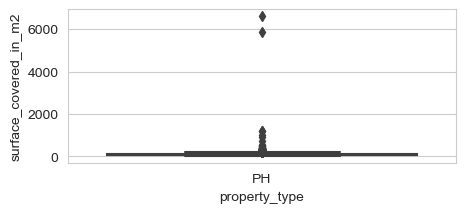

In [171]:
# Gráfico de la cantidad de datos en la columna "surface_covered_in_m2" filtrado por tipo de propiedad PH;
sns.set_style("whitegrid");
plt.figure(figsize=(5,2))
sns.boxplot(data=df_price_and_m2_PH, x="property_type", y="surface_covered_in_m2")

In [172]:
# Datos donde superficie cubierta es mayor a superficie total;
df_price_and_m2.loc[df_price_and_m2["surface_covered_in_m2"] > df_price_and_m2["surface_total_in_m2"]]

price_usd_per_m2  surface_total_in_m2  price_aprox_usd  \
82           3440.000000                125.0         430000.0   
83           3440.000000                125.0         430000.0   
354          1850.000000                 80.0         148000.0   
569                  NaN                 34.0              NaN   
1120         1944.444444                144.0         280000.0   
...                  ...                  ...              ...   
114826        850.000000                100.0          85000.0   
114972       1285.714286                280.0         360000.0   
115090       2931.034483                 58.0         170000.0   
115143               NaN                522.0              NaN   
115606       1666.666667                375.0         625000.0   

        surface_covered_in_m2 property_type             state_name  
82                      156.0         house        Capital Federal  
83                      156.0         house        Capital Federal  
354                      89.0     apartment        Capital Federal  
569                      36.0     apartment        Capital Federal  
1120                    147.0     apartment        Capital Federal  
...                       ...           ...                    ...  
114826                  150.0         house  Buenos Aires Interior  
114972                  332.0         house  Buenos Aires Interior  
115090                   59.0     apartment  Buenos Aires Interior  
115143                  700.0         store  Buenos Aires Interior  
115606                  625.0         house  Buenos Aires Interior  

[1046 rows x 6 columns]

In [173]:
df_price_and_m2_surface_covered_m2_sorted = df_price_and_m2.sort_values("surface_covered_in_m2", ascending= False)

df_price_and_m2_surface_covered_m2_sorted.head(50)

price_usd_per_m2  surface_total_in_m2  price_aprox_usd  \
48168                NaN                 35.0              NaN   
70553          64.516129              93000.0        6000000.0   
113331               NaN              25186.0              NaN   
76507          72.000000              25000.0        1800000.0   
54453                NaN              22355.0              NaN   
63658                NaN                  NaN              NaN   
63565         219.512195              20500.0        4500000.0   
48073                NaN              20000.0              NaN   
50764                NaN              18375.0              NaN   
101964        514.285714              14000.0        7200000.0   
48036         606.060606              13200.0        8000000.0   
111004               NaN                  NaN        9000000.0   
47883         556.506849              11680.0        6500000.0   
18031         775.688994              10958.0        8500000.0   
72075                NaN              10000.0              NaN   
110917        317.073171               8200.0        2600000.0   
48012         240.000000              10000.0        2400000.0   
17583        1036.001036               7722.0        8000000.0   
47942         763.157895               7600.0        5800000.0   
62377         168.302945               7130.0        1200000.0   
63103         428.571429               7000.0        3000000.0   
99643        1000.000000                100.0         100000.0   
47364                NaN               6500.0              NaN   
47795                NaN               6500.0              NaN   
47970                NaN               6500.0              NaN   
110888       1048.387097               6200.0        6500000.0   
69014         700.000000               6000.0        4200000.0   
80149                NaN               6000.0              NaN   
110697       1603.448276                 58.0          93000.0   
22905         846.623351               5079.0        4300000.0   
78905                NaN                  NaN        2300000.0   
48081         640.000000               5000.0        3200000.0   
52691         647.511129               4942.0        3200000.0   
62786        1048.951049               4290.0        4500000.0   
62780        1048.951049               4290.0        4500000.0   
48217                NaN                  NaN        3500000.0   
17447         833.333333               4800.0        4000000.0   
18027        1354.166667               4800.0        6500000.0   
80246                NaN               4760.0              NaN   
80247                NaN               4760.0              NaN   
80462                NaN               4700.0              NaN   
62390         543.478261               4600.0        2500000.0   
17501          24.207190               4590.0         111111.0   
17451                NaN                  NaN        5000000.0   
62388         555.555556               4500.0        2500000.0   
110859        459.770115               4350.0        2000000.0   
17700          26.273587               4229.0         111111.0   
104913               NaN               4200.0              NaN   
62386                NaN                  NaN        2000000.0   
63708         376.884422               3980.0        1500000.0   

        surface_covered_in_m2 property_type                    state_name  
48168                 35000.0         store      Bs.As. G.B.A. Zona Norte  
70553                 30000.0         store        Bs.As. G.B.A. Zona Sur  
113331                25186.0         store      Bs.As. G.B.A. Zona Oeste  
76507                 25000.0         store                       Córdoba  
54453                 22355.0         store      Bs.As. G.B.A. Zona Norte  
63658                 19826.0         store        Bs.As. G.B.A. Zona Sur  
63565                 19609.0         store        Bs.As. G.B.A. Zona Sur  
48073                 19200.0    

In [174]:
# Graficamos los precios por M2 en usd por tipo de propiedad

fig = px.scatter(data_frame = df_price_and_m2_surface_covered_m2_sorted, x = "property_type", y = "price_usd_per_m2", size_max = 10, 
               width=700, height=500)

fig.update_layout(
    title='<b>Precio por M2 en USD por tipo de propiedad</b>')
fig.show()

In [175]:
df.sort_values("surface_covered_in_m2", ascending= False)

state_name  rooms  price_usd_per_m2        lon  \
41436   Bs.As. G.B.A. Zona Norte    NaN        516.666667        NaN   
48168   Bs.As. G.B.A. Zona Norte    NaN               NaN        NaN   
70553     Bs.As. G.B.A. Zona Sur    NaN         64.516129 -58.425045   
113331  Bs.As. G.B.A. Zona Oeste    NaN               NaN -58.530716   
76507                    Córdoba    NaN         72.000000        NaN   
...                          ...    ...               ...        ...   
115626     Buenos Aires Interior    NaN        384.615385 -58.247924   
115627     Buenos Aires Interior    4.0               NaN -58.263382   
115648     Buenos Aires Interior    NaN               NaN -63.616672   
115651     Buenos Aires Interior    NaN        300.925926 -57.902854   
115656     Buenos Aires Interior    NaN               NaN        NaN   

              lat  surface_total_in_m2  price_aprox_usd  \
41436         NaN               1200.0         620000.0   
48168         NaN                 35.0              NaN   
70553  -34.781917              93000.0        6000000.0   
113331 -34.638347              25186.0              NaN   
76507         NaN              25000.0        1800000.0   
...           ...                  ...              ...   
115626 -37.854036                312.0         120000.0   
115627 -37.854446                  NaN         280000.0   
115648 -38.416097                  NaN         100000.0   
115651 -34.922468                432.0         130000.0   
115656        NaN                  NaN         220000.0   

        surface_covered_in_m2             place_name  geonames_id  \
41436                 38240.0                  Delta          NaN   
48168                 35000.0            Tortuguitas          NaN   
70553                 30000.0        Lomas de Zamora    3431270.0   
113331                25186.0              Ciudadela    3435376.0   
76507                 25000.0                Córdoba    3860255.0   
...                       ...                    ...          ...   
115626                    NaN               Balcarce    3436176.0   
115627                    NaN               Balcarce    3436176.0   
115648                    NaN  Buenos Aires Interior    3435907.0   
115651                    NaN                Berisso    3436038.0   
115656                    NaN                Ranchos    3429610.0   

                                                    title  \
41436   Casa 1200m² con 2 Plantas, Tigre, Delta, por U...   
48168                       Nave Industrial - Tortuguitas   
70553   LAVALLOL. Predio Industrial de 93.000 m2 y 30....   
113331                     Edificio Comercial - Ciudadela   
76507   Excelente nave industrial, Planta de Silo y Mo...   
...                                                   ...   
115626                         Casa en zona residencial     
115627                 Impecable casa en zona residencial   
115648  CASA EN VENTA EN ITUZAINGO SUR S/ LOTE DE 12 X...   
115651   Casa Amplia con Cochera y Dto interno con Patio    
115656                                     Casa - Ranchos   

                                              description property_type  
41436   Terreno de 20mts frente x 60mts fondo, Total 1...         house  
48168   Plaza Logística Tortugas CÓDIGO 0703 T35.000 m...         store  
70553   CODIGO: 2484-FB0007 ubicado en: Garibaldi al 2...         store  
113331  VENTA EN SUBASTA - 31/08/2017-  12HS.VALOR BAS...         store  
76507    Los Surgentes, Córdoba - CÓDIGO 0433Excelente...         store  
...                                                   ...           ...  
115626  Casa sobre lote de 12,5x25. La casa cuenta con...         house  
115627  Sobre lote de 10x45.Entrada a recibidor con ho...         house  
115648  CODIGO: 3025-131 ubicado en: cuyo 386 entre co...         house  
115651  Casa en venta de 3 dormitorios  uno en suite ;...         house  
115656        Casa, General Paz, Ranchos, por U$S 220.000         house 

In [176]:
q_price_usd_per_m2_deciles = pd.qcut(df_price_and_m2.price_usd_per_m2, 10)
q_price_usd_per_m2_deciles

0         (1083.333, 1372.76]
1         (1083.333, 1372.76]
2                         NaN
3          (2687.8, 3255.814]
4          (2687.8, 3255.814]
                 ...         
115683                    NaN
115684         (0.599, 640.0]
115685      (1600.0, 1822.43]
115686         (0.599, 640.0]
115687                    NaN
Name: price_usd_per_m2, Length: 108842, dtype: category
Categories (10, interval[float64]): [(0.599, 640.0] < (640.0, 1083.333] < (1083.333, 1372.76] < (1372.76, 1600.0] ... (2058.824, 2333.333] < (2333.333, 2687.8] < (2687.8, 3255.814] < (3255.814, 206333.333]]

In [177]:
# Comenzamos analizando las columnas surface_total_in_m2 y surface_covered_in_m2 en cuanto a minimos, máximos, mean, std;

df_price_and_m2.groupby(["state_name","property_type"]).agg(["mean", "min", "max", "std"])

price_usd_per_m2              \
                                                       mean         min   
state_name                   property_type                                
Bs.As. G.B.A. Zona Norte     PH                 1451.712566   49.485588   
                             apartment          2539.091362   31.246621   
                             house              1341.425750    4.166667   
                             store              1862.009755  158.730159   
Bs.As. G.B.A. Zona Oeste     PH                 1224.018825   77.893944   
                             apartment          1719.034280   22.107656   
                             house              1054.738504    7.000000   
                             store              1556.947316   28.041833   
Bs.As. G.B.A. Zona Sur       PH                 1114.012013   50.475300   
                             apartment          1887.051012   91.135875   
                             house              1162.128533   19.314341   
                             store              1541.024184   22.222222   
Buenos Aires Costa Atlántica PH                 1156.454370   55.000000   
                             apartment          1960.695303   26.262626   
                             house               750.067920    3.000000   
                             store              1401.045662   82.540833   
Buenos Aires Interior        PH                 1019.888682   45.824847   
                             apartment          1643.059367  107.853077   
                             house               647.793745    2.072029   
                             store               987.670901  133.928571   
Capital Federal              PH                 1695.517729  120.964706   
                             apartment          3325.046571   49.000000   
                             house              1547.702460  190.000000   
                             store              2899.667204   13.797467   
Córdoba                      PH                 1544.048178   36.601307   
                             apartment          1428.786003    1.184571   
                             house               713.957748   12.254902   
                             store              1458.775597   31.406853   
Santa Fe                     PH                 1207.188748  218.103167   
                             apartment          2392.245874    0.600000   
                             house               992.499135   37.916667   
                             store              3002.901146  416.666667   

                                                                        \
                                                      max          std   
state_name                   property_type                               
Bs.As. G.B.A. Zona Norte     PH              11333.333333   938.917931   
                             apartment       48296.222222  2381.409025   
                             house           38000.000000  1191.303241   
                             store           20833.333333  1819.141377   
Bs.As. G.B.A. Zona Oeste     PH              16000.000000  1159.268926   
                             apartment       24500.000000   871.499734   
                             house           80000.000000  1953.833497   
                             store           11818.181818  1627.518711   
Bs.As. G.B.A. Zona Sur       PH               2800.000000   490.746480   
                             apartment       23140.764706  1235.663100   
                             house            9411.764706   760.880381   
                             store           13000.000000  1524.366776   
Buenos Aires Costa Atlántica PH               5957.446809   554.608810   
                             apartment       21897.058824   815.420575   
                             house            5698.005128   534.333850   
                             store            4740.259740   953.937115   
Buenos Aire

In [178]:
# Dividimos los precios por M2 en intervalos para ver la concentración de la muestra.

price_intervalos = pd.interval_range(start=0, freq=1000, end=220000, closed='left')
price_categories = pd.cut(df["price_usd_per_m2"], bins = price_intervalos)

df.pivot_table('price_usd_per_m2', [price_categories], ['property_type'], fill_value='No existen', aggfunc='count')

property_type             PH   apartment       house       store
price_usd_per_m2                                                
[0, 1000)                812        1341        8892         493
[1000, 2000)            1783       15544        8473         692
[2000, 3000)             499       16994        1549         376
[3000, 4000)              32        4997         268         204
[4000, 5000)               3        1310          51          95
[5000, 6000)               3         571          33          66
[6000, 7000)               1         312          12          24
[7000, 8000)      No existen         103           7          18
[8000, 9000)               1          49          10          12
[9000, 10000)     No existen          45          10           3
[10000, 11000)             2          30           5           6
[11000, 12000)             2          11           3           2
[12000, 13000)    No existen          26           1           2
[13000, 14000)    No existen          49           3           4
[14000, 15000)             1          39           8           1
[15000, 16000)    No existen          31           6           2
[16000, 17000)             1          22           2           1
[17000, 18000)    No existen          57           3  No existen
[18000, 19000)    No existen          40           1           1
[19000, 20000)    No existen          39           2           1
[20000, 21000)    No existen          57           5           1
[21000, 22000)    No existen          69  No existen  No existen
[22000, 23000)    No existen          21  No existen           1
[23000, 24000)    No existen          74           1  No existen
[24000, 25000)    No existen          73  No existen  No existen
[25000, 26000)             1          48  No existen  No existen
[26000, 27000)    No existen           7           2  No existen
[27000, 28000)    No existen           6           1  No existen
[28000, 29000)    No existen           4  No existen  No existen
[29000, 30000)    No existen           1  No existen  No existen
[30000, 31000)             1           4           1  No existen
[31000, 32000)    No existen           6  No existen  No existen
[32000, 33000)    No existen          12  No existen  No existen
[33000, 34000)    No existen           4  No existen  No existen
[34000, 35000)    No existen           8  No existen  No existen
[35000, 36000)    No existen           3  No existen  No existen
[36000, 37000)    No existen           1           1  No existen
[37000, 38000)    No existen           3  No existen  No existen
[38000, 39000)    No existen           1           1  No existen
[39000, 40000)    No existen           4  No existen  No existen
[40000, 41000)    No existen           2  No existen  No existen
[42000, 43000)    No existen           3  No existen  No existen
[43000, 44000)    No existen           7  No existen  No existen
[44000, 45000)    No existen           6  No existen  No existen
[45000, 46000)    No existen           2  No existen  No existen
[48000, 49000)    No existen           3  No existen  No existen
[57000, 58000)    No existen  No existen  No existen           1
[78000, 79000)    No existen           1  No existen  No existen
[80000, 81000)    No existen  No existen           1  No existen
[104000, 105000)  No existen           1  No existen  No existen
[110000, 111000)           0           0           0           0
[173000, 174000)  No existen           1  No existen  No existen
[206000, 207000)  No existen           1  No existen  No existen

In [179]:
# No termina de cerrarnos lo que vemos en los dos análisis ateriores, por lo que empezamos a ver outliers y datos erróneos de precio en uss por m2;
df_price_and_m2_PH_Capital_Federal = df_price_and_m2.loc[(df_price_and_m2["property_type"] == "PH") & (df_price_and_m2["state_name"] == "Capital Federal"),:].sort_values("price_usd_per_m2", ascending = False)

df_price_and_m2_PH_Capital_Federal.shape

(1828, 6)

In [180]:
# Cantidad de nulos por property_type==PH & state_name==Capital Federal;
df_price_and_m2_PH_Capital_Federal_null = df_price_and_m2.loc[(df_price_and_m2["property_type"] == "PH") & (df_price_and_m2["state_name"] == "Capital Federal"),:].sort_values("price_usd_per_m2", ascending = False)["price_usd_per_m2"].isnull().sum()

df_price_and_m2_PH_Capital_Federal_null

562

In [181]:
# Calculamos proporción de nulos por property_type==PH & state_name==Capital Federal;
df_price_and_m2_PH_Capital_Federal_null / df_price_and_m2_PH_Capital_Federal.shape[0] *100

30.743982494529543

In [182]:
# Analizamos la cantidad total de registros donde la superficie cubierta es mayor a la superficie total;

df_price_and_m2.loc[(df_price_and_m2["surface_covered_in_m2"] > df_price_and_m2["surface_total_in_m2"]) & (df_price_and_m2["state_name"] == "Capital Federal"),:].shape

#Son 107 registros;

(105, 6)

In [183]:
# Segmentamos los que son registros que tienen mayor superficie cubierta que superficie total por tipo de propiedad, house;
df_price_and_m2.loc[(df_price_and_m2["surface_covered_in_m2"] > df_price_and_m2["surface_total_in_m2"]) & (df_price_and_m2["state_name"] == "Capital Federal") & (df_price_and_m2["property_type"] == "house"),:].shape

(31, 6)

In [184]:
#Quiero estar seguro de que está bien esto.

df[df.duplicated() == True]

state_name  rooms  price_usd_per_m2        lon        lat  \
53            Capital Federal    2.0       3447.753623 -58.438233 -34.565265   
83            Capital Federal    NaN       3440.000000        NaN        NaN   
117           Capital Federal    2.0       6481.481481 -58.361766 -34.617915   
137           Capital Federal    NaN       1531.250000        NaN        NaN   
291           Capital Federal    4.0               NaN -58.443087 -34.562188   
...                       ...    ...               ...        ...        ...   
115480  Buenos Aires Interior    NaN       1794.677556        NaN        NaN   
115481  Buenos Aires Interior    NaN       1200.000000        NaN        NaN   
115482  Buenos Aires Interior    NaN       1794.677556        NaN        NaN   
115550  Buenos Aires Interior    2.0               NaN -60.273716 -38.381390   
115650  Buenos Aires Interior    5.0        200.000000 -59.078922 -34.497174   

        surface_total_in_m2  price_aprox_usd  surface_covered_in_m2  \
53                     69.0        237895.00                   53.0   
83                    125.0        430000.00                  156.0   
117                    54.0        350000.00                   50.0   
137                   160.0        245000.00                  135.0   
291                   166.0              NaN                  152.0   
...                     ...              ...                    ...   
115480                 90.0        161520.98                   80.0   
115481                 90.0        108000.00                   80.0   
115482                 90.0        161520.98                   80.0   
115550                 63.0        115000.00                   63.0   
115650                250.0         50000.00                  200.0   

                place_name  geonames_id  \
53                Belgrano    3436077.0   
83         Capital Federal    3433955.0   
117          Puerto Madero    3429760.0   
137        Capital Federal    3433955.0   
291               Belgrano    3436077.0   
...                    ...          ...   
115480  General Pueyrredón    3433782.0   
115481  General Pueyrredón    3433782.0   
115482  General Pueyrredón    3433782.0   
115550        Tres Arroyos    3833857.0   
115650           Open Door    3430287.0   

                                                    title  \
53                                       Ultimas Unidades   
83      Casa 125m² con 3 Plantas en Lezica, Martín 300...   
117                   ZenCity 2 Amb piso ALTO! Vista RIO    
137     Casa 160m² con 3 Plantas en Marconi, Ing. 2400...   
291                                            VIEW POINT   
...                                                   ...   
115480  DEPARTAMENTO A ESTRENAR EN POZO LA PERLA METRO...   
115481  DEPARTAMENTO A ESTRENAR EN POZO LA PERLA METRO...   
115482  DEPARTAMENTO A ESTRENAR EN POZO LA PERLA METRO...   
115550                 A ESTRENAR !!! Duplex de 2 dormit.   
115650                                         Casa venta   

                                              description property_type  
53      El edificio está situado en el barrio de  las ...     apartment  
83      Buena ubicaciÃ³n. Muy buen acceso. Lezica esq....         house  
117     En su dique 1, y delimitado por el Boulevard J...     apartment  
137     Duplex de buenisimas medidas ( 5X33) Hall de a...         house  
291     Inmejorable ubicación en  la esquina de Av. Li...     apartment  
...                                                   ...           ...  
115480  DEPARTAMENTO A ESTRENAR EN POZO LA PERLA METRO...     apartment  
115481  DEPARTAMENTO A ESTRENAR EN POZO LA PERLA METRO...     apartment  
115482  DEPARTAMENTO A ESTRENAR EN POZO LA PERLA METRO...     apartment  
115550  DEUPLEX DE 2, DORMIT. A ESTRENAR! Living-comed...     apartment  
115650  Venta sólo contado SIN FINANCIACIÓN. Casa fren...         house  

[4570 rows x 13 columns]

In [185]:
#Falta ver esto
df_price_and_m2[df_price_and_m2.duplicated(subset=["price_usd_per_m2", "surface_total_in_m2", "price_aprox_usd", "surface_covered_in_m2", "property_type", "state_name"]) == True]

price_usd_per_m2  surface_total_in_m2  price_aprox_usd  \
49                   NaN                 49.0              NaN   
53           3447.753623                 69.0         237895.0   
83           3440.000000                125.0         430000.0   
116          1775.000000                200.0         355000.0   
117          6481.481481                 54.0         350000.0   
...                  ...                  ...              ...   
115648               NaN                  NaN         100000.0   
115650        200.000000                250.0          50000.0   
115656               NaN                  NaN         220000.0   
115666               NaN                120.0         170000.0   
115672        220.000000               1000.0         220000.0   

        surface_covered_in_m2 property_type             state_name  
49                       45.0     apartment        Capital Federal  
53                       53.0     apartment        Capital Federal  
83                      156.0         house        Capital Federal  
116                     178.0     apartment        Capital Federal  
117                      50.0     apartment        Capital Federal  
...                       ...           ...                    ...  
115648                    NaN         house  Buenos Aires Interior  
115650                  200.0         house  Buenos Aires Interior  
115656                    NaN         house  Buenos Aires Interior  
115666                  120.0     apartment  Buenos Aires Interior  
115672                  175.0         house  Buenos Aires Interior  

[27056 rows x 6 columns]

In [186]:
df_price_and_m2.groupby("state_name").sum()

price_usd_per_m2  surface_total_in_m2  \
state_name                                                            
Bs.As. G.B.A. Zona Norte          3.235014e+07            5230905.0   
Bs.As. G.B.A. Zona Oeste          6.162636e+06            1420526.0   
Bs.As. G.B.A. Zona Sur            9.392027e+06            1597308.0   
Buenos Aires Costa Atlántica      9.990698e+06            1307795.0   
Buenos Aires Interior             9.697018e+05             438807.0   
Capital Federal                   7.301587e+07            3178130.0   
Córdoba                           4.480644e+06            1122466.0   
Santa Fe                          8.623835e+06             767246.0   

                              price_aprox_usd  surface_covered_in_m2  
state_name                                                            
Bs.As. G.B.A. Zona Norte         7.651206e+09              4147526.0  
Bs.As. G.B.A. Zona Oeste         1.185842e+09              1008209.0  
Bs.As. G.B.A. Zona Sur           2.316901e+09              1605014.0  
Buenos Aires Costa Atlántica     1.222759e+09               869187.0  
Buenos Aires Interior            2.999317e+08               258538.0  
Capital Federal                  7.659458e+09              2767803.0  
Córdoba                          1.616714e+09              1285744.0  
Santa Fe                         7.339291e+08               624020.0

In [187]:
# DUDA --> ¿Cómo hacemos para comparar que los valores de la columna superficie total y siempre mayor a los valores de la columna superficie cubierta?

In [188]:
# Quiero saber cuántos NaN hay por state_name en la columna price_usd_per_m2;


df.groupby(["state_name", "property_type"])["price_usd_per_m2", "surface_total_in_m2", "price_aprox_usd", "surface_covered_in_m2", "price_aprox_local_currency"].std().sort_values("price_usd_per_m2", ascending=False)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_12440\3707789311.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



KeyError: "Columns not found: 'price_aprox_local_currency'"

In [ ]:
df.pivot_table("price_usd_per_m2", "state_name", "property_type", aggfunc=["std", "mean", "min", "max"])

std                            \
property_type                          PH    apartment        house   
state_name                                                            
Bs.As. G.B.A. Zona Norte       938.917931  2387.647600  1192.540046   
Bs.As. G.B.A. Zona Oeste      1159.268926   884.332015  2057.741767   
Bs.As. G.B.A. Zona Sur         490.746480  1254.532586   776.448121   
Buenos Aires Costa Atlántica   554.608810   816.429473   535.291906   
Buenos Aires Interior          512.080247   517.445768   559.256520   
Capital Federal                887.360632  3892.824716  1654.290655   
Córdoba                       4070.615915   535.260531   777.244171   
Santa Fe                       406.055353  4330.735192  2103.129777   

                                                  mean               \
property_type                       store           PH    apartment   
state_name                                                            
Bs.As. G.B.A. Zona Norte      1819.141377  1451.712566  2539.871735   
Bs.As. G.B.A. Zona Oeste      1627.518711  1224.018825  1720.754481   
Bs.As. G.B.A. Zona Sur        1524.366776  1114.012013  1889.978782   
Buenos Aires Costa Atlántica   953.937115  1156.454370  1958.838430   
Buenos Aires Interior          610.157332  1019.888682  1633.999387   
Capital Federal               2222.673859  1695.517729  3324.464870   
Córdoba                        844.103398  1544.048178  1426.524689   
Santa Fe                      7963.224291  1207.188748  2391.993013   

                                                               min             \
property_type                       house        store          PH  apartment   
state_name                                                                      
Bs.As. G.B.A. Zona Norte      1339.764409  1862.009755   49.485588  29.906933   
Bs.As. G.B.A. Zona Oeste      1081.629587  1556.947316   77.893944  20.898642   
Bs.As. G.B.A. Zona Sur        1164.503788  1541.024184   50.475300  91.135875   
Buenos Aires Costa Atlántica   749.149782  1401.045662   55.000000   1.000000   
Buenos Aires Interior          643.236465   987.670901   45.824847  15.160342   
Capital Federal               1546.701574  2899.667204  120.964706  31.369688   
Córdoba                        713.335035  1458.775597   36.601307   1.184571   
Santa Fe                       990.905762  3002.901146  218.103167   0.600000   

                                                               max  \
property_type                      house       store            PH   
state_name                                                           
Bs.As. G.B.A. Zona Norte        4.166667  158.730159  11333.333333   
Bs.As. G.B.A. Zona Oeste        7.000000   28.041833  16000.000000   
Bs.As. G.B.A. Zona Sur         19.314341   22.222222   2800.000000   
Buenos Aires Costa Atlántica    3.000000   82.540833   5957.446809   
Buenos Aires Interior           2.072029  133.928571   1867.647059   
Capital Federal               190.000000   13.797467  25000.000000   
Córdoba                        12.254902   31.406853  30000.000000   
Santa Fe                        9.388501  416.666667   1724.573000   

                                                                         
property_type                     apartment         house         store  
state_name                                                               
Bs.As. G.B.A. Zona Norte       48296.222222  38000.000000  20833.333333  
Bs.As. G.B.A. Zona Oeste       24500.000000  80000.000000  11818.181818  
Bs.As. G.B.A. Zona Sur         23140.764706   9411.764706  13000.000000  
Buenos Aires Costa Atlántica   21897.058824   5698.005128   4740.259740  
Buenos Aires Interior           3657.142857   4166.666667   2333.333333  
Capital Federal               206333.333333  23064.516129  22000.000000  
Córdoba                        14960.000000  16666.666667   5521.472393  
Santa Fe                       44425.675676  36549.707237  57382.080000

In [ ]:
# Revisamos la composición del mix de propiedades dentro de cada provincia.

state_y_type_mix = (df.groupby(['state_name', 'property_type']))["price", "price_aprox_local_currency", "price_aprox_usd", "price_usd_per_m2", "surface_covered_in_m2", "surface_total_in_m2"]

df.pivot_table("price_usd_per_m2", index="state_name", columns=["state_name", "property_type"])


# state_y_type_mix.loc[:,["price", "price_aprox_local_currency", "price_aprox_usd", "price_usd_per_m2", "surface_covered_in_m2", "surface_total_in_m2"]]

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16224\2535899502.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



state_name                   Bs.As. G.B.A. Zona Norte               \
property_type                                      PH    apartment   
state_name                                                           
Bs.As. G.B.A. Zona Norte                  1451.712566  2539.871735   
Bs.As. G.B.A. Zona Oeste                          NaN          NaN   
Bs.As. G.B.A. Zona Sur                            NaN          NaN   
Buenos Aires Costa Atlántica                      NaN          NaN   
Buenos Aires Interior                             NaN          NaN   
Capital Federal                                   NaN          NaN   
Córdoba                                           NaN          NaN   
Santa Fe                                          NaN          NaN   

state_name                                              \
property_type                       house        store   
state_name                                               
Bs.As. G.B.A. Zona Norte      1339.764409  1862.009755   
Bs.As. G.B.A. Zona Oeste              NaN          NaN   
Bs.As. G.B.A. Zona Sur                NaN          NaN   
Buenos Aires Costa Atlántica          NaN          NaN   
Buenos Aires Interior                 NaN          NaN   
Capital Federal                       NaN          NaN   
Córdoba                               NaN          NaN   
Santa Fe                              NaN          NaN   

state_name                   Bs.As. G.B.A. Zona Oeste               \
property_type                                      PH    apartment   
state_name                                                           
Bs.As. G.B.A. Zona Norte                          NaN          NaN   
Bs.As. G.B.A. Zona Oeste                  1224.018825  1720.754481   
Bs.As. G.B.A. Zona Sur                            NaN          NaN   
Buenos Aires Costa Atlántica                      NaN          NaN   
Buenos Aires Interior                             NaN          NaN   
Capital Federal                                   NaN          NaN   
Córdoba                                           NaN          NaN   
Santa Fe                                          NaN          NaN   

state_name                                             Bs.As. G.B.A. Zona Sur  \
property_type                       house        store                     PH   
state_name                                                                      
Bs.As. G.B.A. Zona Norte              NaN          NaN                    NaN   
Bs.As. G.B.A. Zona Oeste      1081.629587  1556.947316                    NaN   
Bs.As. G.B.A. Zona Sur                NaN          NaN            1114.012013   
Buenos Aires Costa Atlántica          NaN          NaN                    NaN   
Buenos Aires Interior                 NaN          NaN                    NaN   
Capital Federal                       NaN          NaN                    NaN   
Córdoba                               NaN          NaN                    NaN   
Santa Fe                              NaN          NaN                    NaN   

state_name                                 ... Capital Federal               \
property_type                   apartment  ...           house        store   
state_name                                 ...                                
Bs.As. G.B.A. Zona Norte              NaN  ...             NaN          NaN   
Bs.As. G.B.A. Zona Oeste              NaN  ...             NaN          NaN   
Bs.As. G.B.A. Zona Sur        1889.978782  ...             NaN          NaN   
Buenos Aires Costa Atlántica          NaN  ...             NaN          NaN   
Buenos Aires Interior                 NaN  ...             NaN          NaN   
Capital Federal                       NaN  ...     1546.701574  2899.667204   
Córdoba                               NaN  ...             NaN          NaN   
Santa Fe                              NaN  ...             NaN          NaN   

state_name                        Córdoba                

In [ ]:
df.head(3)

state_name  rooms  price_usd_per_m2        lon        lat  \
0  Capital Federal    NaN       1127.272727 -58.508839 -34.661824   
1  Capital Federal    NaN       1309.090909 -58.522982 -34.652262   
2  Capital Federal    NaN               NaN -58.516424 -34.647797   

   surface_total_in_m2  price_aprox_usd  price_aprox_local_currency    price  \
0                 55.0          62000.0                   1093959.0  62000.0   
1                 55.0          72000.0                   1270404.0  72000.0   
2                  NaN          95000.0                   1676227.5  95000.0   

   surface_covered_in_m2 place_name  geonames_id  \
0                   40.0  Mataderos    3430787.0   
1                   55.0  Mataderos    3430787.0   
2                    NaN    Liniers    3431333.0   

                                      title  \
0        2 AMB TIPO CASA SIN EXPENSAS EN PB   
1  2 AMB 3ER PISO CON ASCENSOR APTO CREDITO   
2              PH 3 amb. cfte. reciclado      

                                         description property_type  
0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...            PH  
1  2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...     apartment  
2  PH 3 ambientes con patio. Hay 3 deptos en lote...            PH

In [ ]:
df.groupby("state_name").sum()

floor    expenses    rooms  price_usd_per_m2  \
state_name                                                                     
Bs.As. G.B.A. Zona Norte       7147.0  12926104.0  21661.0      3.238687e+07   
Bs.As. G.B.A. Zona Oeste       2057.0   1756889.0  14329.0      6.240610e+06   
Bs.As. G.B.A. Zona Sur         1118.0   4287371.0   9420.0      9.416028e+06   
Buenos Aires Costa Atlántica    825.0    906538.0  22004.0      9.998920e+06   
Buenos Aires Interior            84.0    183488.0   3798.0      9.705104e+05   
Capital Federal               14165.0  41902139.0  41584.0      7.304215e+07   
Córdoba                        1950.0   3829720.0  16755.0      4.480915e+06   
Santa Fe                       2238.0   1930574.0  10017.0      8.625408e+06   

                                       lon            lat  \
state_name                                                  
Bs.As. G.B.A. Zona Norte     -6.709070e+05 -394168.331187   
Bs.As. G.B.A. Zona Oeste     -3.293698e+05 -194598.172284   
Bs.As. G.B.A. Zona Sur       -3.478982e+05 -207740.771305   
Buenos Aires Costa Atlántica -4.714543e+05 -310316.140925   
Buenos Aires Interior        -9.348831e+04  -57073.157595   
Capital Federal              -1.389029e+06 -822485.221406   
Córdoba                      -3.291815e+05 -161139.841850   
Santa Fe                     -3.266505e+05 -175822.377721   

                              surface_total_in_m2  price_aprox_usd  \
state_name                                                           
Bs.As. G.B.A. Zona Norte                5888821.0     7.802421e+09   
Bs.As. G.B.A. Zona Oeste                1593780.0     1.228612e+09   
Bs.As. G.B.A. Zona Sur                  1639034.0     2.399546e+09   
Buenos Aires Costa Atlántica            1492864.0     1.299341e+09   
Buenos Aires Interior                   1269373.0     3.324155e+08   
Capital Federal                         3151884.0     7.823345e+09   
Córdoba                                 2050506.0     1.840356e+09   
Santa Fe                                 997608.0     7.557069e+08   

                              price_aprox_local_currency         price  \
state_name                                                               
Bs.As. G.B.A. Zona Norte                    1.376698e+11  1.101509e+10   
Bs.As. G.B.A. Zona Oeste                    2.167825e+10  1.410931e+09   
Bs.As. G.B.A. Zona Sur                      4.233879e+10  2.932530e+09   
Buenos Aires Costa Atlántica                2.292623e+10  2.154183e+09   
Buenos Aires Interior                       5.865305e+09  6.040101e+08   
Capital Federal                             1.380390e+11  1.111251e+10   
Córdoba                                     3.247216e+10  8.484470e+09   
Santa Fe                                    1.333407e+10  6.211581e+09   

                              surface_covered_in_m2   geonames_id  
state_name                                                         
Bs.As. G.B.A. Zona Norte                  4279033.0  5.289845e+10  
Bs.As. G.B.A. Zona Oeste                  1030931.0  2.742407e+10  
Bs.As. G.B.A. Zona Sur                    1634320.0  3.267782e+10  
Buenos Aires Costa Atlántica               888034.0  3.088088e+10  
Buenos Aires Interior                      290854.0  7.794471e+09  
Capital Federal                           2931325.0  1.094785e+11  
Córdoba                                   1283796.0  4.633996e+10  
Santa Fe                                   592367.0  3.897947e+10

In [ ]:
df.groupby(["state_name","property_type"]).describe()

floor                        \
                                              count       mean        std   
state_name                   property_type                                  
Bs.As. G.B.A. Zona Norte     PH                14.0   1.714286   1.138729   
                             apartment       1623.0   4.380160   5.102793   
                             house          13364.0   0.000000   0.000000   
                             store             13.0   1.076923   0.277350   
Bs.As. G.B.A. Zona Oeste     PH                31.0   3.000000   2.280351   
                             apartment        535.0   3.661682   2.856678   
                             house           4663.0   0.000000   0.000000   
                             store              4.0   1.250000   0.500000   
Bs.As. G.B.A. Zona Sur       PH                24.0   2.166667   2.035910   
                             apartment        237.0   4.485232   3.496486   
                             house           6985.0   0.000000   0.000000   
                             store              2.0   1.500000   0.707107   
Buenos Aires Costa Atlántica PH                 6.0   3.000000   1.549193   
                             apartment        155.0   5.200000   4.484316   
                             house           2685.0   0.000000   0.000000   
                             store              1.0   1.000000        NaN   
Buenos Aires Interior        PH                 2.0   3.000000   2.828427   
                             apartment         21.0   3.619048   2.438774   
                             house           1325.0   0.000000   0.000000   
                             store              1.0   2.000000        NaN   
Capital Federal              PH               155.0   2.251613   2.211521   
                             apartment       2773.0   4.955283   4.337346   
                             house           2087.0   0.000000   0.000000   
                             store              8.0   9.375000  10.979689   
Córdoba                      PH               268.0   3.910448   2.959053   
                             apartment        344.0   2.587209   3.844417   
                             house           4521.0   0.000000   0.000000   
                             store              9.0   1.333333   0.500000   
Santa Fe                     PH                11.0   2.636364   1.911687   
                             apartment        470.0   4.678723   4.356816   
                             house           1924.0   0.000000   0.000000   
                             store              1.0  10.000000        NaN   

                                                                            \
                                             min    25%   50%    75%   max   
state_name                   property_type                                   
Bs.As. G.B.A. Zona Norte     PH              1.0   1.00   1.0   2.00   5.0   
                             apartment       1.0   1.00   3.0   5.00  50.0   
                             house           0.0   0.00   0.0   0.00   0.0   
                             store           1.0   1.00   1.0   1.00   2.0   
Bs.As. G.B.A. Zona Oeste     PH              1.0   1.00   2.0   4.00   9.0   
                             apartment       1.0   2.00   3.0   5.00  24.0   
                             house           0.0   0.00   0.0   0.00   0.0   
                             store           1.0   1.00   1.0   1.25   2.0   
Bs.As. G.B.A. Zona Sur       PH              1.0   1.00   1.5   2.25  10.0   
                             apartment       1.0   2.00   4.0   7.00  20.0   
                             house           0.0   0.00   0.0   0.00   0.0   
                             store           1.0   1.25   1.5   1.75   2.0   
Buenos Aires Costa Atlántica PH              2.0   2.00   2.5   3.00   6.0   
                             apartment       1.0   2.00   4.0   7.00  22.0   
                        

In [ ]:
min_surface_covered_in_m2 = df["surface_covered_in_m2"].min()
print("min_surface_covered_in_m2", min_surface_covered_in_m2)

max_surface_covered_in_m2 = df["surface_covered_in_m2"].max()
print("max_surface_covered_in_m2", max_surface_covered_in_m2)

mean_surface_covered_in_m2 = df["surface_covered_in_m2"].mean()
print("mean_surface_covered_in_m2", mean_surface_covered_in_m2)

min_surface_covered_in_m2 0.0
max_surface_covered_in_m2 187000.0
mean_surface_covered_in_m2 132.02095074736584


In [ ]:
#Estoy queriendo ver cuál es el dato que tiene este valor de superficie cubierta en m2 pero no estoy pudiendo dar en cómo hacerlo.
df.sort_values("surface_covered_in_m2", ascending=False)

state_name  floor  expenses  rooms  \
20644                Capital Federal    NaN   11000.0    NaN   
98185   Buenos Aires Costa Atlántica    NaN       NaN    2.0   
41436       Bs.As. G.B.A. Zona Norte    0.0       NaN    NaN   
48168       Bs.As. G.B.A. Zona Norte    NaN       NaN    NaN   
70553         Bs.As. G.B.A. Zona Sur    NaN       NaN    NaN   
...                              ...    ...       ...    ...   
115651         Buenos Aires Interior    0.0       NaN    NaN   
115656         Buenos Aires Interior    0.0       NaN    NaN   
115658         Buenos Aires Interior    NaN       NaN    NaN   
115677         Buenos Aires Interior    NaN       NaN    NaN   
115682         Buenos Aires Interior    NaN       NaN    NaN   

        price_usd_per_m2        lon        lat  surface_total_in_m2 currency  \
20644                NaN -58.409166 -34.594573                  NaN      USD   
98185        1423.076923 -57.547773 -37.989809                 52.0      USD   
41436         516.666667        NaN        NaN               1200.0      USD   
48168                NaN        NaN        NaN                 35.0      NaN   
70553          64.516129 -58.425045 -34.781917              93000.0      USD   
...                  ...        ...        ...                  ...      ...   
115651        300.925926 -57.902854 -34.922468                432.0      USD   
115656               NaN        NaN        NaN                  NaN      USD   
115658               NaN -62.270166 -38.712532                  NaN      USD   
115677       2373.913043        NaN        NaN                 92.0      USD   
115682               NaN -62.262843 -38.718968                  NaN      USD   

        price_aprox_usd  price_aprox_local_currency      price  \
20644          600000.0                  10586700.0   600000.0   
98185           74000.0                   1305693.0    74000.0   
41436          620000.0                  10939590.0   620000.0   
48168               NaN                         NaN        NaN   
70553         6000000.0                 105867000.0  6000000.0   
...                 ...                         ...        ...   
115651         130000.0                   2293785.0   130000.0   
115656         220000.0                   3881790.0   220000.0   
115658          78000.0                   1376271.0    78000.0   
115677         218400.0                   3853558.8   218400.0   
115682          75000.0                   1323337.5    75000.0   

        surface_covered_in_m2       place_name  geonames_id  \
20644                187000.0     Barrio Norte    3436109.0   
98185                 49000.0    Mar del Plata    3430863.0   
41436                 38240.0            Delta          NaN   
48168                 35000.0      Tortuguitas          NaN   
70553                 30000.0  Lomas de Zamora    3431270.0   
...                       ...              ...          ...   
115651                    NaN          Berisso    3436038.0   
115656                    NaN          Ranchos    3429610.0   
115658                    NaN     Bahía Blanca    3865084.0   
115677                    NaN            Luján    3430982.0   
115682                    NaN     Bahía Blanca    3865084.0   

                                                    title  \
20644                      Excelente PISO en Barrio Norte   
98185                      oportunidad frente al  mar!!!!   
41436   Casa 1200m² con 2 Plantas, Tigre, Delta, por U...   
48168                       Nave Industrial - Tortuguitas   
70553   LAVALLOL. Predio Industrial de 93.000 m2 y 30....   
...                                                   ...   
115651   Casa Amplia con Cochera y Dto interno con Patio    
115656                                     Casa - Ranchos   
115658                                     Caronti Nº 108   
115677                     Departamento - Centro De Lujan   
115682                          Venta dto 1 dorm céntrico   

             

In [ ]:
df.pivot_table("price_usd_per_m2", index="state_name", columns="property_type", aggfunc=["mean", "max", "min"])

mean                            \
property_type                          PH    apartment        house   
state_name                                                            
Bs.As. G.B.A. Zona Norte      1451.712566  2539.871735  1339.764409   
Bs.As. G.B.A. Zona Oeste      1224.018825  1720.754481  1081.629587   
Bs.As. G.B.A. Zona Sur        1114.012013  1889.978782  1164.503788   
Buenos Aires Costa Atlántica  1156.454370  1958.838430   749.149782   
Buenos Aires Interior         1019.888682  1633.999387   643.236465   
Capital Federal               1695.517729  3324.464870  1546.701574   
Córdoba                       1544.048178  1426.524689   713.335035   
Santa Fe                      1207.188748  2391.993013   990.905762   

                                                    max                 \
property_type                       store            PH      apartment   
state_name                                                               
Bs.As. G.B.A. Zona Norte      1862.009755  11333.333333   48296.222222   
Bs.As. G.B.A. Zona Oeste      1556.947316  16000.000000   24500.000000   
Bs.As. G.B.A. Zona Sur        1541.024184   2800.000000   23140.764706   
Buenos Aires Costa Atlántica  1401.045662   5957.446809   21897.058824   
Buenos Aires Interior          987.670901   1867.647059    3657.142857   
Capital Federal               2899.667204  25000.000000  206333.333333   
Córdoba                       1458.775597  30000.000000   14960.000000   
Santa Fe                      3002.901146   1724.573000   44425.675676   

                                                                 min  \
property_type                        house         store          PH   
state_name                                                             
Bs.As. G.B.A. Zona Norte      38000.000000  20833.333333   49.485588   
Bs.As. G.B.A. Zona Oeste      80000.000000  11818.181818   77.893944   
Bs.As. G.B.A. Zona Sur         9411.764706  13000.000000   50.475300   
Buenos Aires Costa Atlántica   5698.005128   4740.259740   55.000000   
Buenos Aires Interior          4166.666667   2333.333333   45.824847   
Capital Federal               23064.516129  22000.000000  120.964706   
Córdoba                       16666.666667   5521.472393   36.601307   
Santa Fe                      36549.707237  57382.080000  218.103167   

                                                                 
property_type                 apartment       house       store  
state_name                                                       
Bs.As. G.B.A. Zona Norte      29.906933    4.166667  158.730159  
Bs.As. G.B.A. Zona Oeste      20.898642    7.000000   28.041833  
Bs.As. G.B.A. Zona Sur        91.135875   19.314341   22.222222  
Buenos Aires Costa Atlántica   1.000000    3.000000   82.540833  
Buenos Aires Interior         15.160342    2.072029  133.928571  
Capital Federal               31.369688  190.000000   13.797467  
Córdoba                        1.184571   12.254902   31.406853  
Santa Fe                       0.600000    9.388501  416.666667

In [ ]:
df.pivot_table("price_usd_per_m2", ["state_name", "property_type"], columns="surface_covered_in_m2")

surface_covered_in_m2                           0.0          1.0      \
state_name                   property_type                             
Bs.As. G.B.A. Zona Norte     PH                     NaN          NaN   
                             apartment              NaN          NaN   
                             house                  NaN  3021.995642   
                             store                  NaN          NaN   
Bs.As. G.B.A. Zona Oeste     PH                     NaN          NaN   
                             apartment              NaN          NaN   
                             house                  NaN   712.080264   
                             store                  NaN          NaN   
Bs.As. G.B.A. Zona Sur       PH                     NaN  1046.444266   
                             apartment              NaN  1605.872247   
                             house                  NaN  1353.239659   
                             store                  NaN  1915.638724   
Buenos Aires Costa Atlántica PH                     NaN          NaN   
                             apartment              NaN          NaN   
                             house                  NaN          NaN   
                             store                  NaN          NaN   
Buenos Aires Interior        PH                     NaN          NaN   
                             apartment              NaN          NaN   
                             house                  NaN          NaN   
                             store                  NaN          NaN   
Capital Federal              PH                     NaN          NaN   
                             apartment      2467.788462          NaN   
                             house                  NaN  1662.629332   
                             store                  NaN          NaN   
Córdoba                      PH                     NaN          NaN   
                             apartment              NaN          NaN   
                             house                  NaN   306.666667   
                             store                  NaN          NaN   
Santa Fe                     PH                     NaN          NaN   
                             apartment              NaN          NaN   
                             house                  NaN          NaN   
                             store                  NaN          NaN   

surface_covered_in_m2                           2.0          3.0      \
state_name                   property_type                             
Bs.As. G.B.A. Zona Norte     PH                     NaN          NaN   
                             apartment      2380.000000          NaN   
                             house                  NaN          NaN   
                             store                  NaN          NaN   
Bs.As. G.B.A. Zona Oeste     PH                     NaN          NaN   
                             apartment              NaN          NaN   
                             house                  NaN          NaN   
                             store           680.000000          NaN   
Bs.As. G.B.A. Zona Sur       PH                     NaN          NaN   
                             apartment      1463.414634          NaN   
                             house          1346.153846          NaN   
                             store                  NaN          NaN   
Buenos Aires Costa Atlántica PH                     NaN          NaN   
                             apartment              NaN          NaN   
                             house                  NaN          NaN   
                             store                  NaN          NaN   
Buenos Aires Interior        PH                     NaN          NaN   
                             apartment              NaN          NaN   
                             house                  NaN          NaN   
                             store     

In [ ]:
df.duplicated().sum()

4787